# Project: Vehicle Insurance Claim

# Preparacion del entorno de trabajo


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import pandas as pd  # for data manipulation and analysis
import numpy as np  # for numerical computations
import matplotlib.pyplot as plt  # for data visualization
import seaborn as sns  # for data visualization

# Import preprocessing and feature scaling library
from sklearn.preprocessing import StandardScaler

# Import model selection and evaluation libraries
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV

# Import ensemble learning libraries
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
import lightgbm as lgb  # for LightGBM classifier

# Import oversampling library to handle imbalanced datasets
from imblearn.over_sampling import RandomOverSampler

# Import metrics libraries for model evaluation
from sklearn.metrics import roc_curve, confusion_matrix, roc_auc_score, precision_recall_curve

# Import pipeline library for model building and evaluation
from sklearn.pipeline import Pipeline

# Preprocesamiento de Datos

Objetivos de la seccion

1. Limpieza de Datos:

* Detección y corrección de errores, como valores faltantes y atípicos.
* Normalización y estandarización de los datos.

2. Transformación de Datos:

* Codificación de variables categóricas (ordinal y one-hot).
* Reducción de dimensionalidad mediante selección y extracción de características.

3. Integración de Datos:

* Fusión de conjuntos de datos de múltiples fuentes.
* Resolución de conflictos entre datos.

4. Creación y Manipulación de Variables:

* Generación de nuevas variables relevantes.
* Aplicación de transformaciones matemáticas.

5. Filtrado y Selección de Datos:

* Eliminación de datos irrelevantes y ruido.
* Formato y Estructura de los Datos:

6. Consistencia en el formato de los datos.
Balanceo de Datos:

* Uso de técnicas de sobremuestreo y submuestreo para manejar desbalances

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/fraud_oracle.csv")

In [ ]:
df.head(3)

Month  WeekOfMonth  DayOfWeek   Make AccidentArea DayOfWeekClaimed  \
0   Dec            5  Wednesday  Honda        Urban          Tuesday   
1   Jan            3  Wednesday  Honda        Urban           Monday   
2   Oct            5     Friday  Honda        Urban         Thursday   

  MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  ...  AgeOfVehicle  \
0          Jan                   1  Female        Single  ...       3 years   
1          Jan                   4    Male        Single  ...       6 years   
2          Nov                   2    Male       Married  ...       7 years   

  AgeOfPolicyHolder PoliceReportFiled WitnessPresent AgentType  \
0          26 to 30                No             No  External   
1          31 to 35               Yes             No  External   
2          41 to 50                No             No  External   

   NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  BasePolicy  
0                 none               1 year        3 to 4  1994   Liability  
1                 none            no change     1 vehicle  1994   Collision  
2                 none            no change     1 vehicle  1994   Collision  

[3 rows x 33 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [ ]:
# Check for missing values
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [ ]:
#Checking for duplicate values
df.duplicated().sum()

0

In [ ]:
for column in df:
    print(column)
    print(sorted(df[column].unique()),"\n")

Month
['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'] 

WeekOfMonth
[1, 2, 3, 4, 5] 

DayOfWeek
['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'] 

Make
['Accura', 'BMW', 'Chevrolet', 'Dodge', 'Ferrari', 'Ford', 'Honda', 'Jaguar', 'Lexus', 'Mazda', 'Mecedes', 'Mercury', 'Nisson', 'Pontiac', 'Porche', 'Saab', 'Saturn', 'Toyota', 'VW'] 

AccidentArea
['Rural', 'Urban'] 

DayOfWeekClaimed
['0', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'] 

MonthClaimed
['0', 'Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'] 

WeekOfMonthClaimed
[1, 2, 3, 4, 5] 

Sex
['Female', 'Male'] 

MaritalStatus
['Divorced', 'Married', 'Single', 'Widow'] 

Age
[0, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 7

# EDA

In [ ]:
# Summary statistics for numerical columns - will help us see relevant statistics
df.describe()

WeekOfMonth  WeekOfMonthClaimed           Age  FraudFound_P  \
count  15420.000000        15420.000000  15420.000000  15420.000000   
mean       2.788586            2.693969     39.855707      0.059857   
std        1.287585            1.259115     13.492377      0.237230   
min        1.000000            1.000000      0.000000      0.000000   
25%        2.000000            2.000000     31.000000      0.000000   
50%        3.000000            3.000000     38.000000      0.000000   
75%        4.000000            4.000000     48.000000      0.000000   
max        5.000000            5.000000     80.000000      1.000000   

       PolicyNumber     RepNumber    Deductible  DriverRating          Year  
count  15420.000000  15420.000000  15420.000000  15420.000000  15420.000000  
mean    7710.500000      8.483268    407.704280      2.487808   1994.866472  
std     4451.514911      4.599948     43.950998      1.119453      0.803313  
min        1.000000      1.000000    300.000000      1.000000   1994.000000  
25%     3855.750000      5.000000    400.000000      1.000000   1994.000000  
50%     7710.500000      8.000000    400.000000      2.000000   1995.000000  
75%    11565.250000     12.000000    400.000000      3.000000   1996.000000  
max    15420.000000     16.000000    700.000000      4.000000   1996.000000

In [ ]:
df1 = df.rename(columns={'FraudFound_P': 'FraudFound'})

## Univariado

In [ ]:
# Check how many records are fraud and plot pie chart
labels = df1.FraudFound.value_counts().index
labels = ["No" if i==0 else "Yes" for i in labels]
sizes = df1.FraudFound.value_counts().values

### Claims detected as Fraud

In [ ]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({val})'
    return my_autopct

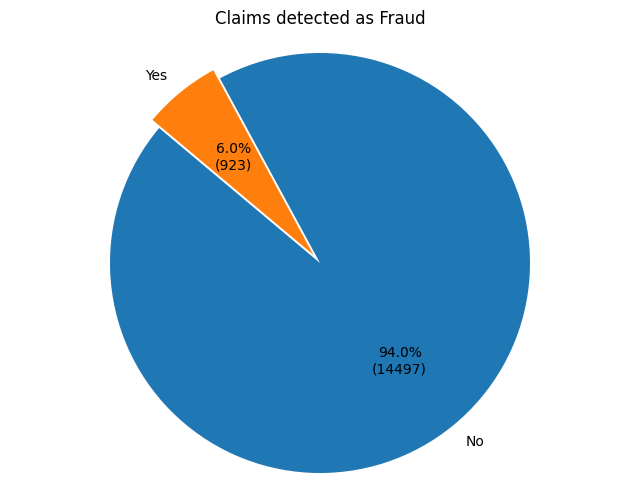

In [ ]:
# Crear el gráfico de pastel
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct=make_autopct(sizes), startangle=140, explode=[0.05, 0])
plt.title('Claims detected as Fraud')
plt.axis('equal')  # Igualar los ejes para que el pastel se vea circular
plt.show()

## Caracteristicas de la Poblacion Fraudes

In [ ]:
df2=df1 [df1['FraudFound'] == 1]
df2.shape

(923, 33)

In [ ]:
def plot_dataframe_grid(df):
    # Determinar el número de columnas del DataFrame
    num_columns = len(df2.columns)

    # Calcular el tamaño de la grilla (asumiendo una distribución cuadrada)
    grid_size = int(num_columns**0.5) + 1

    # Crear una figura grande para acomodar los gráficos
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(20, 20))
    axes = axes.flatten()  # Aplanar la grilla para un acceso más fácil

    for i, col in enumerate(df2.columns):
        # Seleccionar el eje correspondiente
        ax = axes[i]

        # Determinar el tipo de datos de la columna
        if pd.api.types.is_numeric_dtype(df2[col]):
            # Si es numérica, crear un histograma
            sns.histplot(df2[col], kde=True, ax=ax)
            ax.set_title(f'Histograma de {col}')
        else:
            # Si es categórica, crear un gráfico de barras
            sns.countplot(y=df2[col], ax=ax)
            ax.set_title(f'Gráfico de barras de {col}')

    # Eliminar gráficos vacíos
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    # Ajustar el diseño
    plt.tight_layout()
    plt.show()

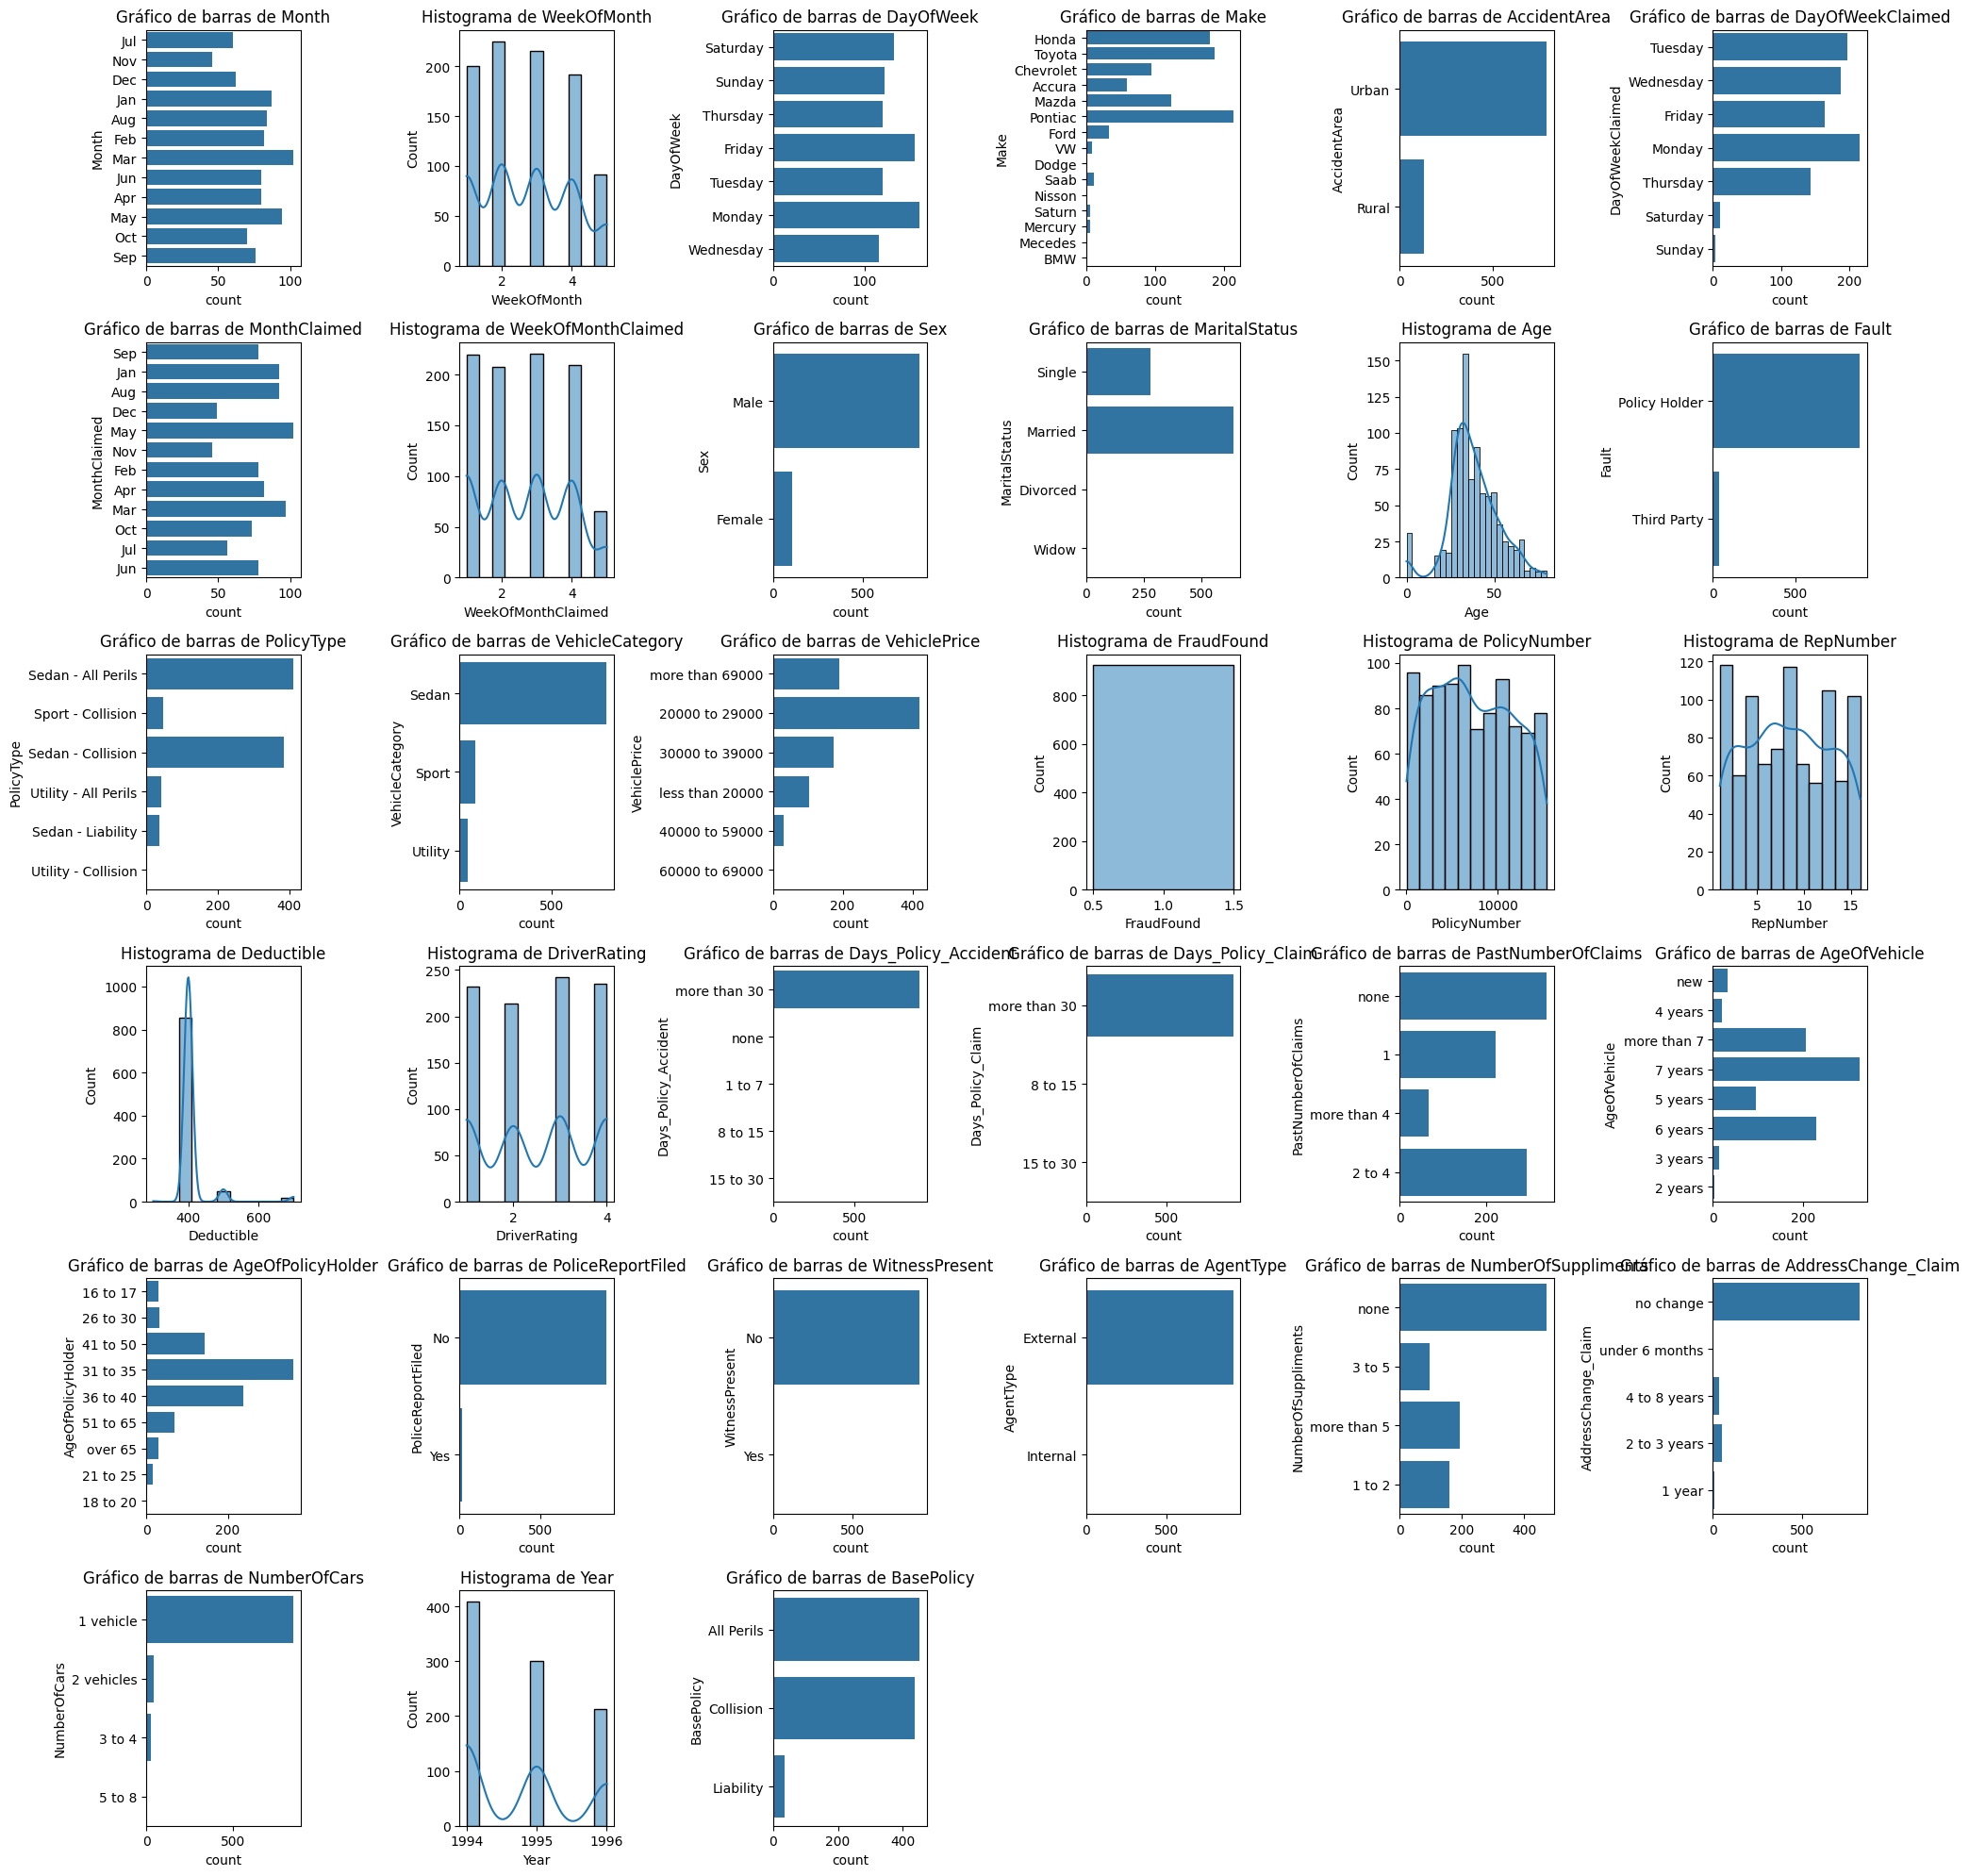

In [ ]:
plot_dataframe_grid(df2)

Only 6% of the claims reported as fraud. As it was expected, the dataset is imbalanced

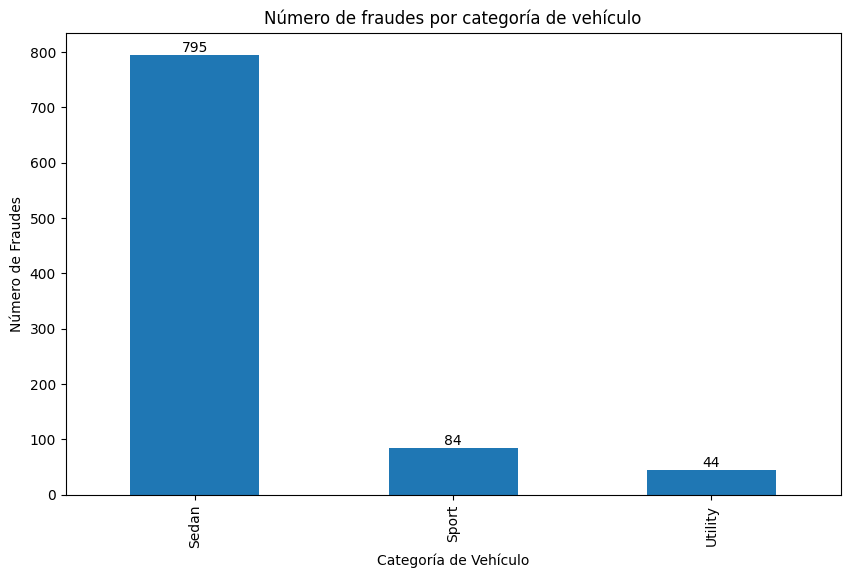

In [ ]:
# Suponiendo que df2 es tu DataFrame y 'VehicleCategory' es la columna de interés
fraud_counts = df2['VehicleCategory'].value_counts()

# Crear el gráfico de barras
ax = fraud_counts.plot(kind='bar', figsize=(10, 6))

# Añadir etiquetas con los valores en cada barra
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

# Añadir título y etiquetas de los ejes
plt.title('Número de fraudes por categoría de vehículo')
plt.xlabel('Categoría de Vehículo')
plt.ylabel('Número de Fraudes')

# Mostrar el gráfico
plt.show()

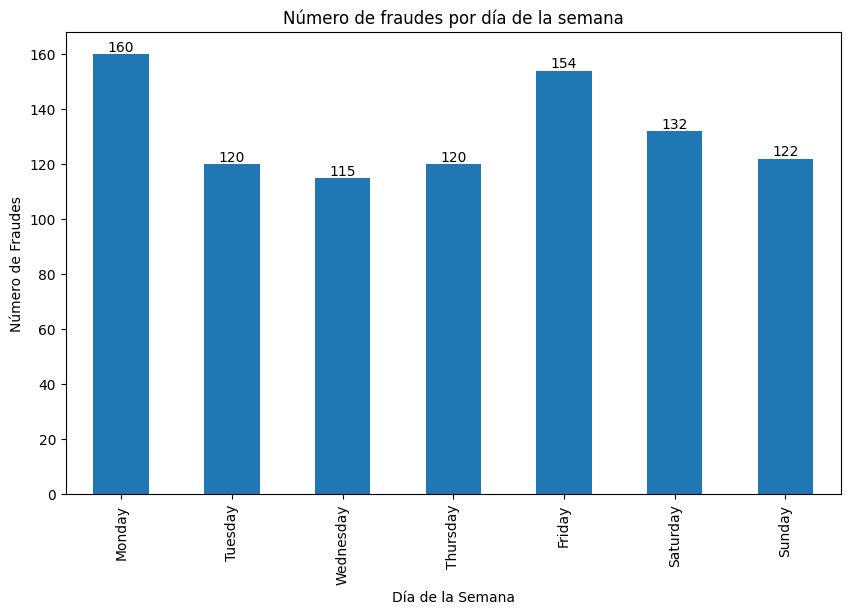

In [ ]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convertir la columna 'DayOfWeek' a una categoría ordenada
df2['DayOfWeek'] = pd.Categorical(df2['DayOfWeek'], categories=days_order, ordered=True)

# Contar los valores de 'DayOfWeek'
fraud_counts = df2['DayOfWeek'].value_counts().sort_index()

# Crear el gráfico de barras
ax = fraud_counts.plot(kind='bar', figsize=(10, 6))

# Añadir etiquetas con los valores en cada barra
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

# Añadir título y etiquetas de los ejes
plt.title('Número de fraudes por día de la semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Fraudes')

# Mostrar el gráfico
plt.show()

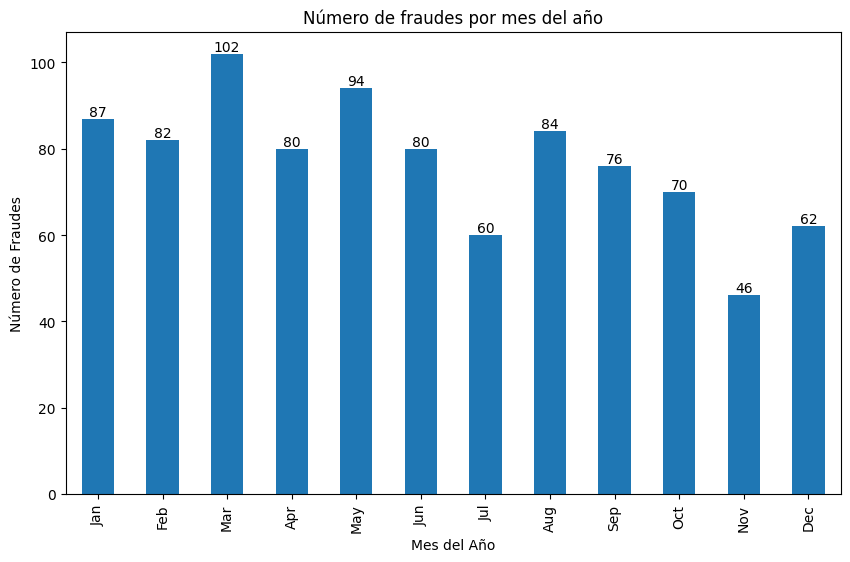

In [ ]:
# Suponiendo que df2 es tu DataFrame y 'Month' es la columna de interés
months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convertir la columna 'Month' a una categoría ordenada
df2['Month'] = pd.Categorical(df2['Month'], categories=months_order, ordered=True)

# Contar los valores de 'Month'
fraud_counts = df2['Month'].value_counts().sort_index()

# Crear el gráfico de barras
ax = fraud_counts.plot(kind='bar', figsize=(10, 6))

# Añadir etiquetas con los valores en cada barra
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

# Añadir título y etiquetas de los ejes
plt.title('Número de fraudes por mes del año')
plt.xlabel('Mes del Año')
plt.ylabel('Número de Fraudes')

# Mostrar el gráfico
plt.show()

### Frauds Per Policy Holder Age Group

The majority of fraud claims are of sedan cars.

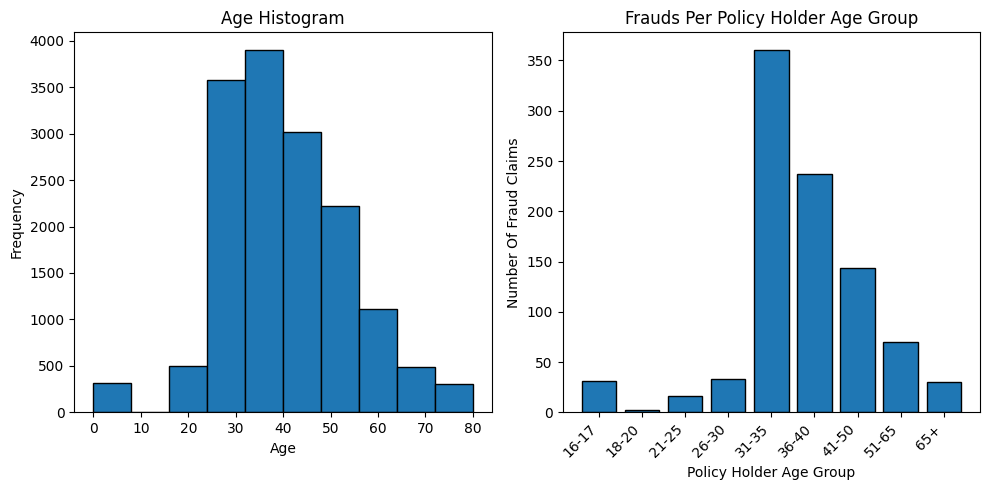

In [ ]:
# Explore age distribution in general and in fraud records

plt.figure(figsize=(10, 5))
# Age histogram
plt.subplot(1, 2, 1)
plt.hist(df1['Age'], bins=10, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Histogram')


mapping_dict = {
    '16 to 17': '16-17',
    '18 to 20': '18-20',
    '21 to 25': '21-25',
    '26 to 30': '26-30',
    '31 to 35': '31-35',
    '36 to 40': '36-40',
    '41 to 50': '41-50',
    '51 to 65': '51-65',
    'over 65': '65+'
}

# Replace values in the DataFrame column
df1['AgeOfPolicyHolder'] = df1['AgeOfPolicyHolder'].replace(mapping_dict)

# Frauds Per Policy Holder Age Group histogram
plt.subplot(1, 2, 2)
policyAge = df1.groupby('AgeOfPolicyHolder')['FraudFound'].sum()
bars = plt.bar(policyAge.index, policyAge.values, edgecolor='black')
plt.title("Frauds Per Policy Holder Age Group")
plt.xlabel("Policy Holder Age Group")
plt.ylabel("Number Of Fraud Claims")
plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()

### Car make count

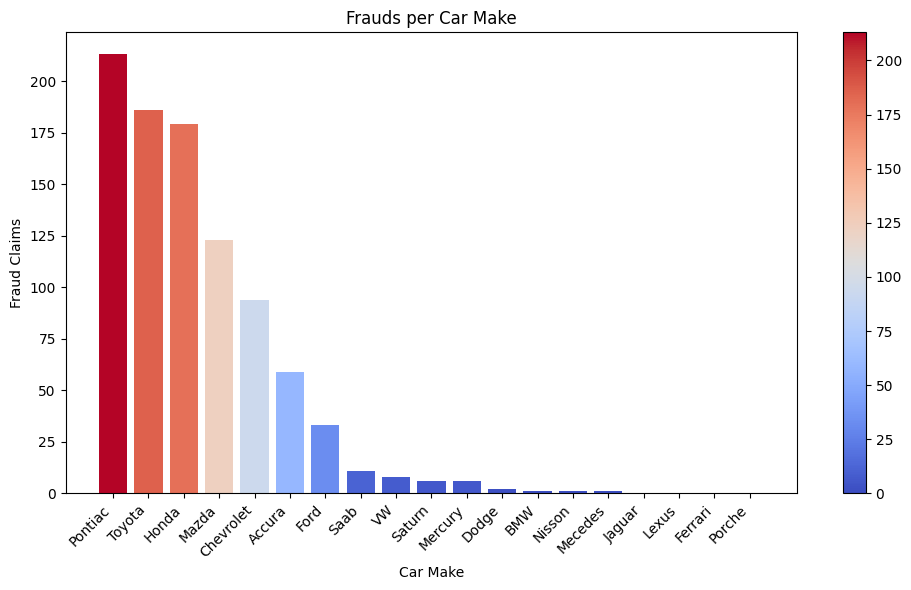

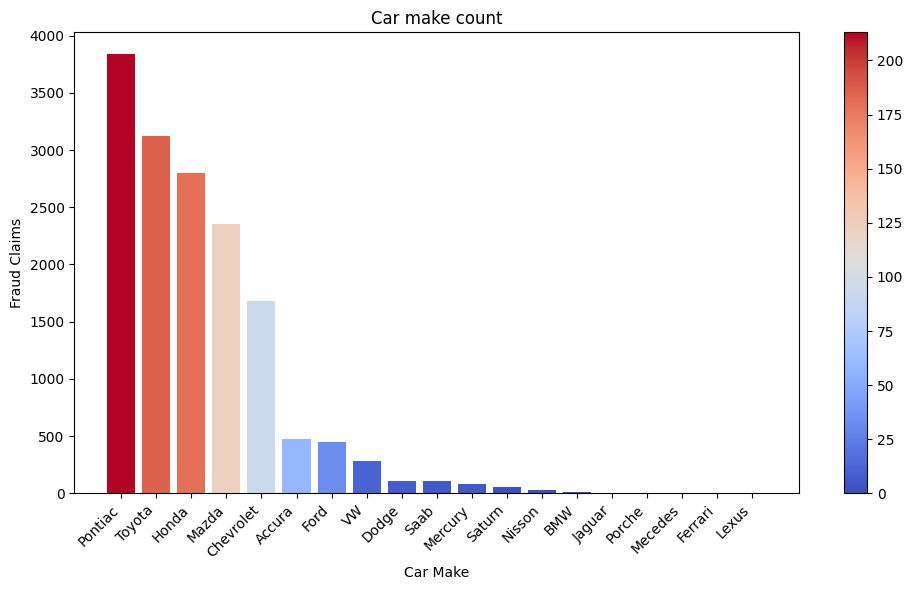

In [ ]:
#Frauds per Car Make
make_frauds = df1.groupby('Make')['FraudFound'].sum()
make_frauds = make_frauds.sort_values(ascending=False)

norm = plt.Normalize(make_frauds.min(), make_frauds.max())
colors = plt.cm.coolwarm(norm(make_frauds.values))

plt.figure(figsize=(10,6))
bars = plt.bar(make_frauds.index, make_frauds.values, color=colors)
plt.title("Frauds per Car Make")
plt.xlabel("Car Make")
plt.ylabel("Fraud Claims")


sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#Car make count
make_car = df1['Make'].value_counts()
plt.figure(figsize=(10, 6))
bars = plt.bar(make_car.index, make_car.values, color=colors)
plt.title("Car make count")
plt.xlabel("Car Make")
plt.ylabel("Fraud Claims")


sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

* On the first graph We can see that for luxury cars like Jaguar Ferrari and Porche there are few to zero evidence of frauds, while the majority of fraudclaims are for car makes like Toyota, Honda and pontiac.
* On the second graph we can see that the total numbers of claims for the luxury cars is low from beginning.

### Fraud Cases by SeX

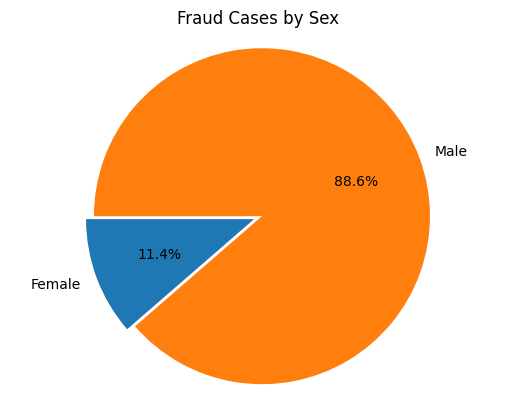

In [ ]:
# Pie Chart to see Fraud records by sex(male/female)
fraud_by_sex = df1[df1['FraudFound'] == 1].groupby('Sex').size()
fig, ax = plt.subplots()
ax.pie(fraud_by_sex, labels=fraud_by_sex.index, autopct='%1.1f%%', startangle=180, explode=[0.05,0])
ax.axis('equal')
ax.set_title('Fraud Cases by Sex')

plt.show()

### Region Distribution by Sex

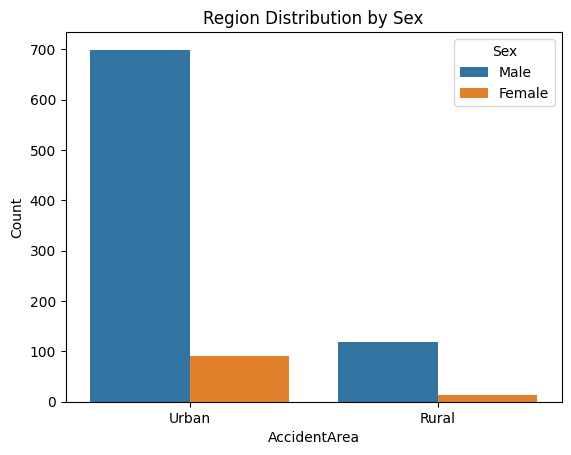

In [ ]:
# Plot of Accident Area by sex for fraud cases
sns.countplot(data=df1[df1['FraudFound'] == 1], x='AccidentArea', hue='Sex')
#plt.figure(figsize=(10, 6))
plt.title('Region Distribution by Sex')
plt.xlabel('AccidentArea')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.show()

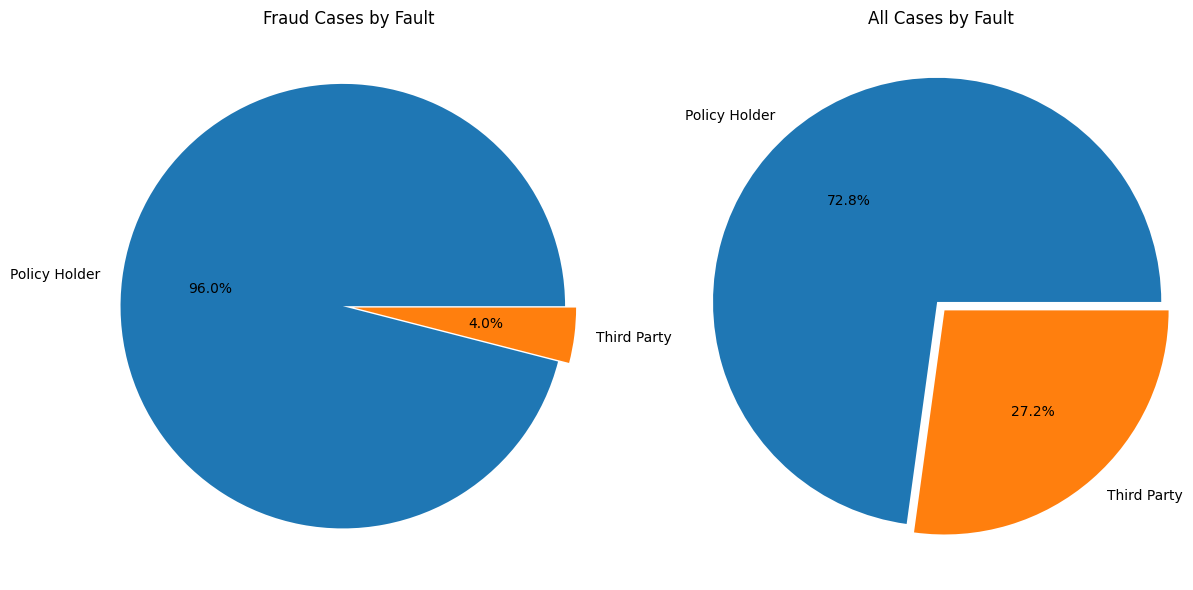

In [ ]:
# Plot Fraud cases by fault - policy holder/third party
fraud_by_fault_fraud = df1[df1['FraudFound'] == 1].groupby('Fault').size()
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1 - Fraud Cases by Fault
axs[0].pie(fraud_by_fault_fraud, labels=fraud_by_fault_fraud.index, autopct='%1.1f%%', explode=[0.05,0])
axs[0].axis('equal')
axs[0].set_title('Fraud Cases by Fault')

# Plot All cases by fault - policy holder/third party
fraud_by_fault_all = df.groupby('Fault').size()


fraud_by_fault_all = fraud_by_fault_all.reindex(fraud_by_fault_fraud.index, fill_value=0)

# Plot 2 - All Cases by Fault
axs[1].pie(fraud_by_fault_all, labels=fraud_by_fault_all.index, autopct='%1.1f%%',explode=[0.05,0])
axs[1].axis('equal')
axs[1].set_title('All Cases by Fault')

plt.tight_layout()
plt.show()

### Fraud Cases by number of cars

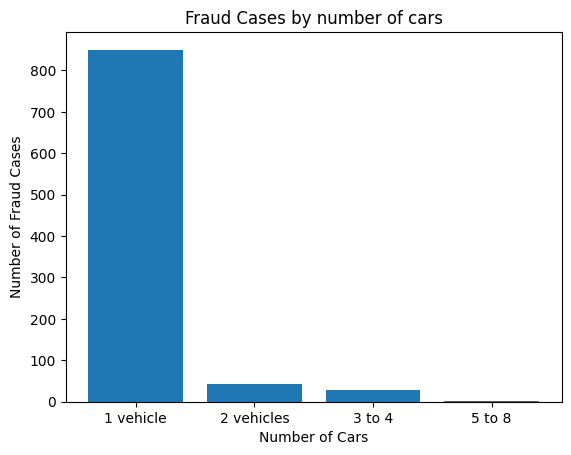

In [ ]:
fraud_by_cars = df1[df1['FraudFound'] == 1].groupby('NumberOfCars').size()
fig, ax = plt.subplots()
ax.bar(fraud_by_cars.index.astype(str), fraud_by_cars)
ax.set_xlabel('Number of Cars')
ax.set_ylabel('Number of Fraud Cases')
ax.set_title('Fraud Cases by number of cars')

plt.show()

In [ ]:
df.PolicyNumber.unique()

array([    1,     2,     3, ..., 15418, 15419, 15420])

In [ ]:
df = df.drop(columns="PolicyNumber")

In [ ]:
for column in df:
    print(column)
    print(sorted(df[column].unique()),"\n")

Month
['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'] 

WeekOfMonth
[1, 2, 3, 4, 5] 

DayOfWeek
['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'] 

Make
['Accura', 'BMW', 'Chevrolet', 'Dodge', 'Ferrari', 'Ford', 'Honda', 'Jaguar', 'Lexus', 'Mazda', 'Mecedes', 'Mercury', 'Nisson', 'Pontiac', 'Porche', 'Saab', 'Saturn', 'Toyota', 'VW'] 

AccidentArea
['Rural', 'Urban'] 

DayOfWeekClaimed
['0', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'] 

MonthClaimed
['0', 'Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'] 

WeekOfMonthClaimed
[1, 2, 3, 4, 5] 

Sex
['Female', 'Male'] 

MaritalStatus
['Divorced', 'Married', 'Single', 'Widow'] 

Age
[0, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 7

In [ ]:
len(df.loc[df.Age == 0])

320

In [ ]:
mask_0 = df["Age"] == 0
df_age_0 = df[mask_0]
df_age_0.AgeOfPolicyHolder.value_counts()

AgeOfPolicyHolder
16 to 17    320
Name: count, dtype: int64

In [ ]:
mask_holder = df["AgeOfPolicyHolder"] == "16 to 17"
age_holder = df[mask_holder]
print(len(age_holder))
np.mean(age_holder.Age)

320


0.0

In [ ]:
age_holder.equals(df_age_0)

True

In [ ]:
pd.DataFrame(df.groupby("AgeOfPolicyHolder")["Age"].mean())

Age
AgeOfPolicyHolder           
16 to 17            0.000000
18 to 20           16.400000
21 to 25           18.814815
26 to 30           22.941272
31 to 35           30.548006
36 to 40           40.483304
41 to 50           50.423267
51 to 65           60.441092
over 65            72.783465

In [ ]:
df_age_0.Fault.value_counts()

Fault
Policy Holder    278
Third Party       42
Name: count, dtype: int64

In [ ]:
df.Age = df.Age.replace(0, 16)

In [ ]:
len(df.loc[df.Age == 0])

0

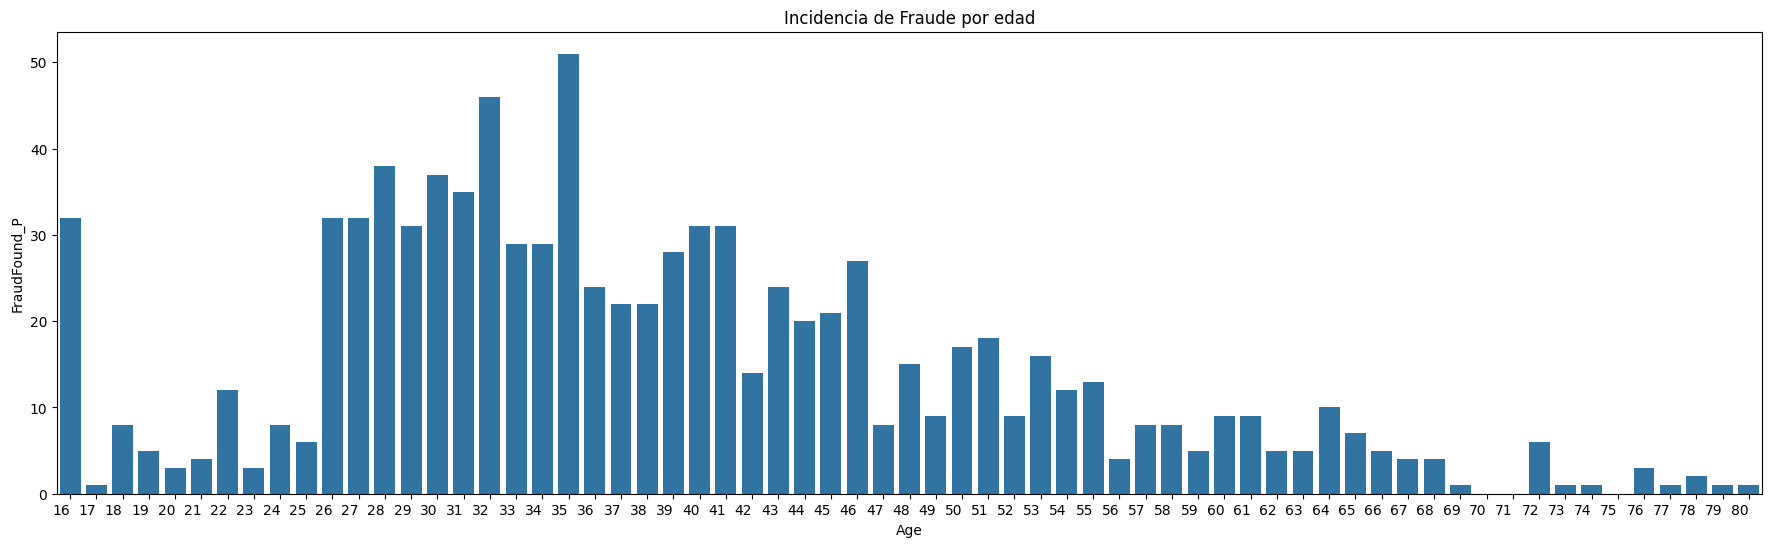

In [ ]:
gpd_by_val=df.groupby('Age').agg({'FraudFound_P':'sum'}).reset_index()

fig, (ax1) = plt.subplots(1,1,figsize=(22, 6))
grph =sns.barplot(x='Age', y='FraudFound_P', data = gpd_by_val, ax=ax1)

plt.title("Incidencia de Fraude por edad")
grph.set_xticklabels(grph.get_xticklabels(),
                    rotation=0,
                    horizontalalignment='right'
                    );

In [ ]:
# cantidad de fraudes con edad 0
ages0 = df_age_0.FraudFound_P.value_counts()
all_ages = df.FraudFound_P.value_counts()

In [ ]:
percent = ages0[1] / all_ages[1] * 100
print(f"Proporcion de fraudes con edad 0 respecto del total: {round(percent, 2)}%")

Proporcion de fraudes con edad 0 respecto del total: 3.36%


In [ ]:
mask_holder2 = df["AgeOfPolicyHolder"] != "16 to 17"

df = df[mask_holder2]

In [ ]:
df.shape

(15100, 32)

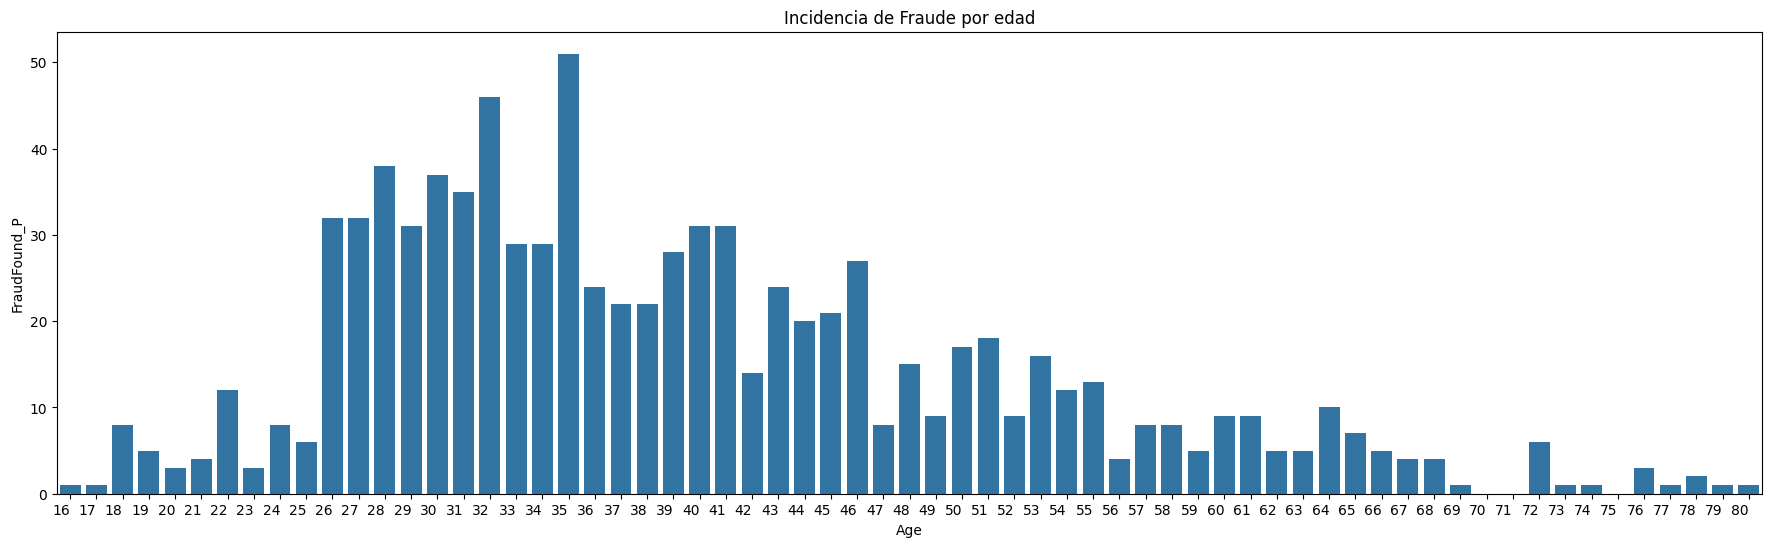

In [ ]:
gpd_by_val=df.groupby('Age').agg({'FraudFound_P':'sum'}).reset_index()

fig, (ax1) = plt.subplots(1,1,figsize=(22, 6))
grph =sns.barplot(x='Age', y='FraudFound_P', data = gpd_by_val, ax=ax1)

plt.title("Incidencia de Fraude por edad")
grph.set_xticklabels(grph.get_xticklabels(),
                    rotation=0,
                    horizontalalignment='right'
                    );

In [ ]:
len(df.loc[df.DayOfWeekClaimed == "0"])

0

In [ ]:
len(df.loc[df.MonthClaimed == "0"])

0

In [ ]:
df.loc[(df.MonthClaimed == "0") | (df.MonthClaimed == "0"), ["MonthClaimed", "DayOfWeekClaimed"]]

Empty DataFrame
Columns: [MonthClaimed, DayOfWeekClaimed]
Index: []

In [ ]:
df[["PolicyType", "VehicleCategory", "BasePolicy"]].head()

PolicyType VehicleCategory BasePolicy
0  Sport - Liability           Sport  Liability
1  Sport - Collision           Sport  Collision
2  Sport - Collision           Sport  Collision
3  Sedan - Liability           Sport  Liability
4  Sport - Collision           Sport  Collision

In [ ]:
def get_car_cat(cat):
    if "Sedan" in cat:
        return "Sedan"
    elif "Sport" in cat:
        return "Sport"
    else:
        return "Utility"

def get_base_policy(pol):
    if "All Perils" in pol:
        return "All Perils"
    elif "Collision" in pol:
        return "Collision"
    else:
        return "Liability"

# Creamos una serie para aplicar las funciones. (make a serie to apply the functions)
policy_type_series = df.PolicyType

# Generamos las nuevas columnas usando las funciones. (Generate new columns using the functions)
vehicle_category_2 = [get_car_cat(x) for x in policy_type_series]
df["VehicleCat_2"] = vehicle_category_2

base_policy_2 = [get_base_policy(x) for x in policy_type_series]
df["BasePolicy_2"] = base_policy_2

In [ ]:
print("Distintos (Mismatch): ", len(df.loc[df.BasePolicy != df.BasePolicy_2, ['BasePolicy', 'BasePolicy_2']]))
print("Iguales (Match): ", len(df.loc[df.BasePolicy == df.BasePolicy_2, ['BasePolicy', 'BasePolicy_2']]))

Distintos (Mismatch):  0
Iguales (Match):  15100


In [ ]:
print("Distintos (Mismatch): ", len(df.loc[df.VehicleCategory != df.VehicleCat_2, ['VehicleCategory', 'VehicleCat_2']]))
print("Iguales (Match): ", len(df.loc[df.VehicleCategory == df.VehicleCat_2, ['VehicleCategory', 'VehicleCat_2']]))

Distintos (Mismatch):  4849
Iguales (Match):  10251


In [ ]:
sedan = len(df.loc[df.VehicleCategory == "Sedan"])
sport = len(df.loc[df.VehicleCategory == "Sport"])
utility = len(df.loc[df.VehicleCategory == "Utility"])
total = sedan + sport + utility

sedan_2 = len(df.loc[df.VehicleCat_2 == "Sedan"])
sport_2 = len(df.loc[df.VehicleCat_2 == "Sport"])
utility_2 = len(df.loc[df.VehicleCat_2 == "Utility"])
total_2 = sedan_2 + sport_2 + utility_2

print("Sedan: ", sedan)
print("Sport: ", sport)
print("Utility: ", utility)
print("Total: ", total, "\n")
print("Sedan2: ", sedan_2)
print("Sport2: ", sport_2)
print("Utility2: ", utility_2)
print("Total: ", total_2)

Sedan:  9510
Sport:  5208
Utility:  382
Total:  15100 

Sedan2:  14359
Sport2:  359
Utility2:  382
Total:  15100


In [ ]:
df = df.drop(columns=["PolicyType","VehicleCat_2", "BasePolicy_2"])

Proporción de fraudes: 5.91%


Text(0, 0.5, 'Cantidad de Observaciones')

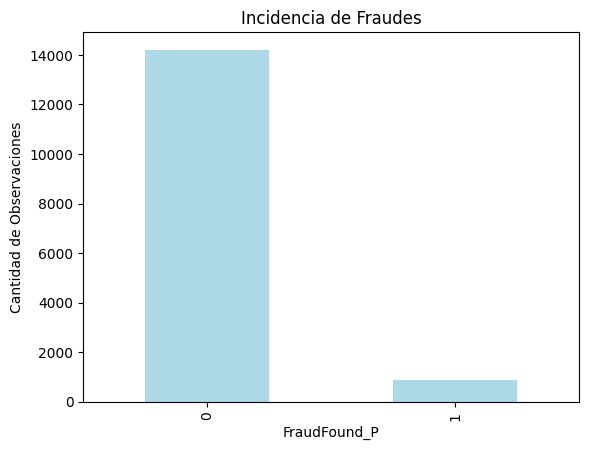

In [ ]:
fraudes = df["FraudFound_P"].value_counts()
porc_fraudes = fraudes[1] / df.shape[0] * 100
print(f"Proporción de fraudes: {round(porc_fraudes, 2)}%")
df["FraudFound_P"].value_counts().plot(kind="bar", color=["lightblue"])
plt.title("Incidencia de Fraudes")
plt.xlabel("FraudFound_P")
plt.ylabel("Cantidad de Observaciones")

DriverRating
1    3866
3    3788
4    3725
2    3721
Name: count, dtype: int64


Text(0, 0.5, 'Cantidad de Observaciones')

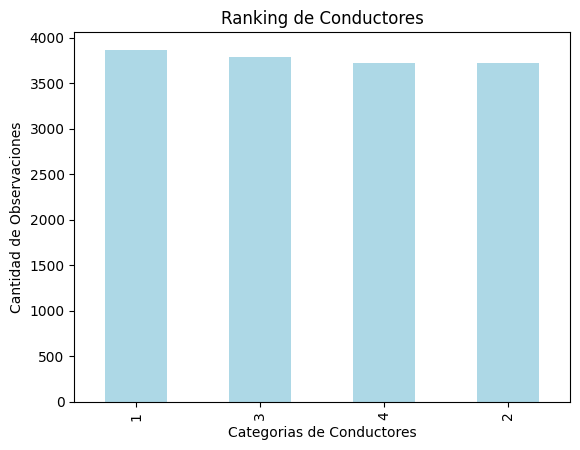

In [ ]:
print(df["DriverRating"].value_counts())
df["DriverRating"].value_counts().plot(kind="bar", color=["lightblue"])
plt.title("Ranking de Conductores")
plt.xlabel("Categorias de Conductores")
plt.ylabel("Cantidad de Observaciones")

### Relación entre fraude y tipo de seguro. (Relationship between fraud and BasePolicy)

In [ ]:
pd.DataFrame(df.groupby("BasePolicy")["FraudFound_P"].mean()*100)

FraudFound_P
BasePolicy              
All Perils      9.847786
Collision       7.295555
Liability       0.718686

### Diferencias entre géneros.

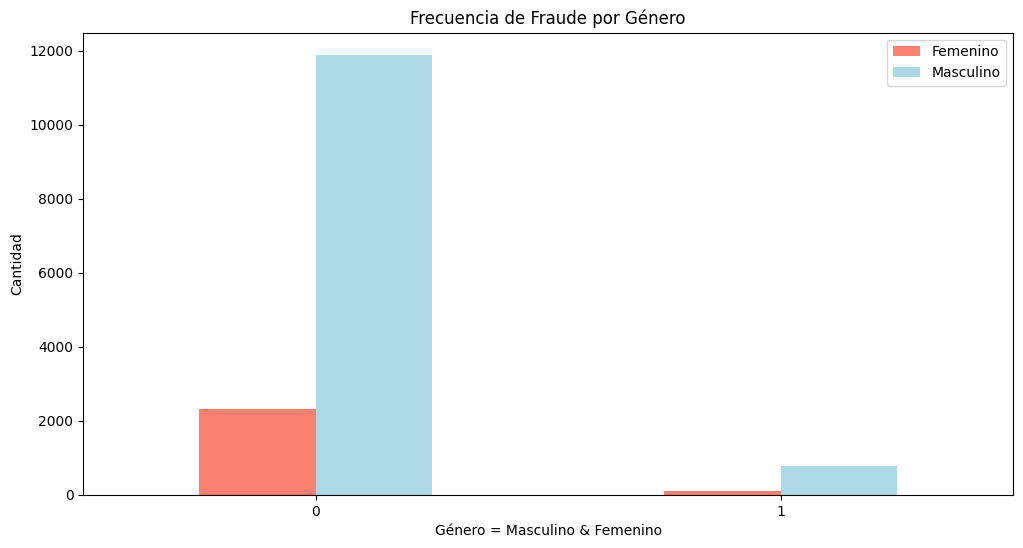

In [ ]:
pd.crosstab(df.FraudFound_P, df.Sex).plot(kind="bar",
                                          color=["salmon","lightblue"],
                                          figsize=(12,6))

plt.title("Frecuencia de Fraude por Género")
plt.xlabel("Género = Masculino & Femenino")
plt.ylabel("Cantidad")
plt.legend(["Femenino","Masculino"])
plt.xticks(rotation = 0);

Proporción de masculinos que cometen fraudes: 6.21%
Proporción de femeninos que cometen fraudes: 4.34%


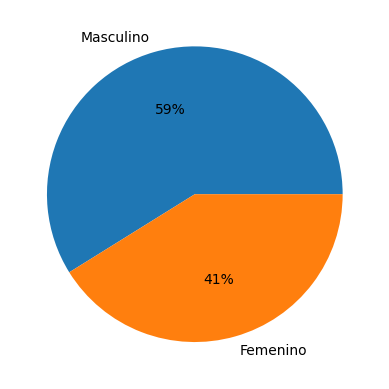

In [ ]:
male_p = df.FraudFound_P[(df.Sex == "Male") & (df.FraudFound_P == 1)].count()
male_neg = df.FraudFound_P[(df.Sex == "Male") & (df.FraudFound_P == 0)].count()
male_prop = male_p/(male_p + male_neg) * 100

female_p = df.FraudFound_P[(df.Sex == "Female") & (df.FraudFound_P == 1)].count()
female_neg = df.FraudFound_P[(df.Sex == "Female") & (df.FraudFound_P == 0)].count()
female_prop = female_p/(female_p + female_neg) * 100

print(f"Proporción de masculinos que cometen fraudes: {round(male_prop, 2)}%")
print(f"Proporción de femeninos que cometen fraudes: {round(female_prop, 2)}%")

data = [male_prop, female_prop]
keys = ['Masculino', 'Femenino']

plt.pie(data, labels=keys, autopct='%.0f%%')

plt.show()

## EDA Bivariado

In [ ]:
df_encoded = pd.get_dummies(df2, drop_first=True)

In [ ]:
df_encoded.shape

(923, 114)

In [ ]:
df_encoded.dtypes

WeekOfMonth                int64
WeekOfMonthClaimed         int64
Age                        int64
FraudFound                 int64
PolicyNumber               int64
                           ...  
NumberOfCars_2 vehicles     bool
NumberOfCars_3 to 4         bool
NumberOfCars_5 to 8         bool
BasePolicy_Collision        bool
BasePolicy_Liability        bool
Length: 114, dtype: object

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = df_encoded.corr()
# La correlación es una medida estadística que describe el grado en que dos variables se relacionan entre sí.
# Puede variar entre -1 y 1. Un valor de 1 indica una correlación positiva perfecta,
# -1 indica una correlación negativa perfecta y 0 indica que no hay correlación lineal.


In [ ]:
# Convertir a NaN las correlaciones con valores absolutos menores a 0.1
threshold = 0.1
correlation_matrix = correlation_matrix.where(correlation_matrix.abs() >= threshold)


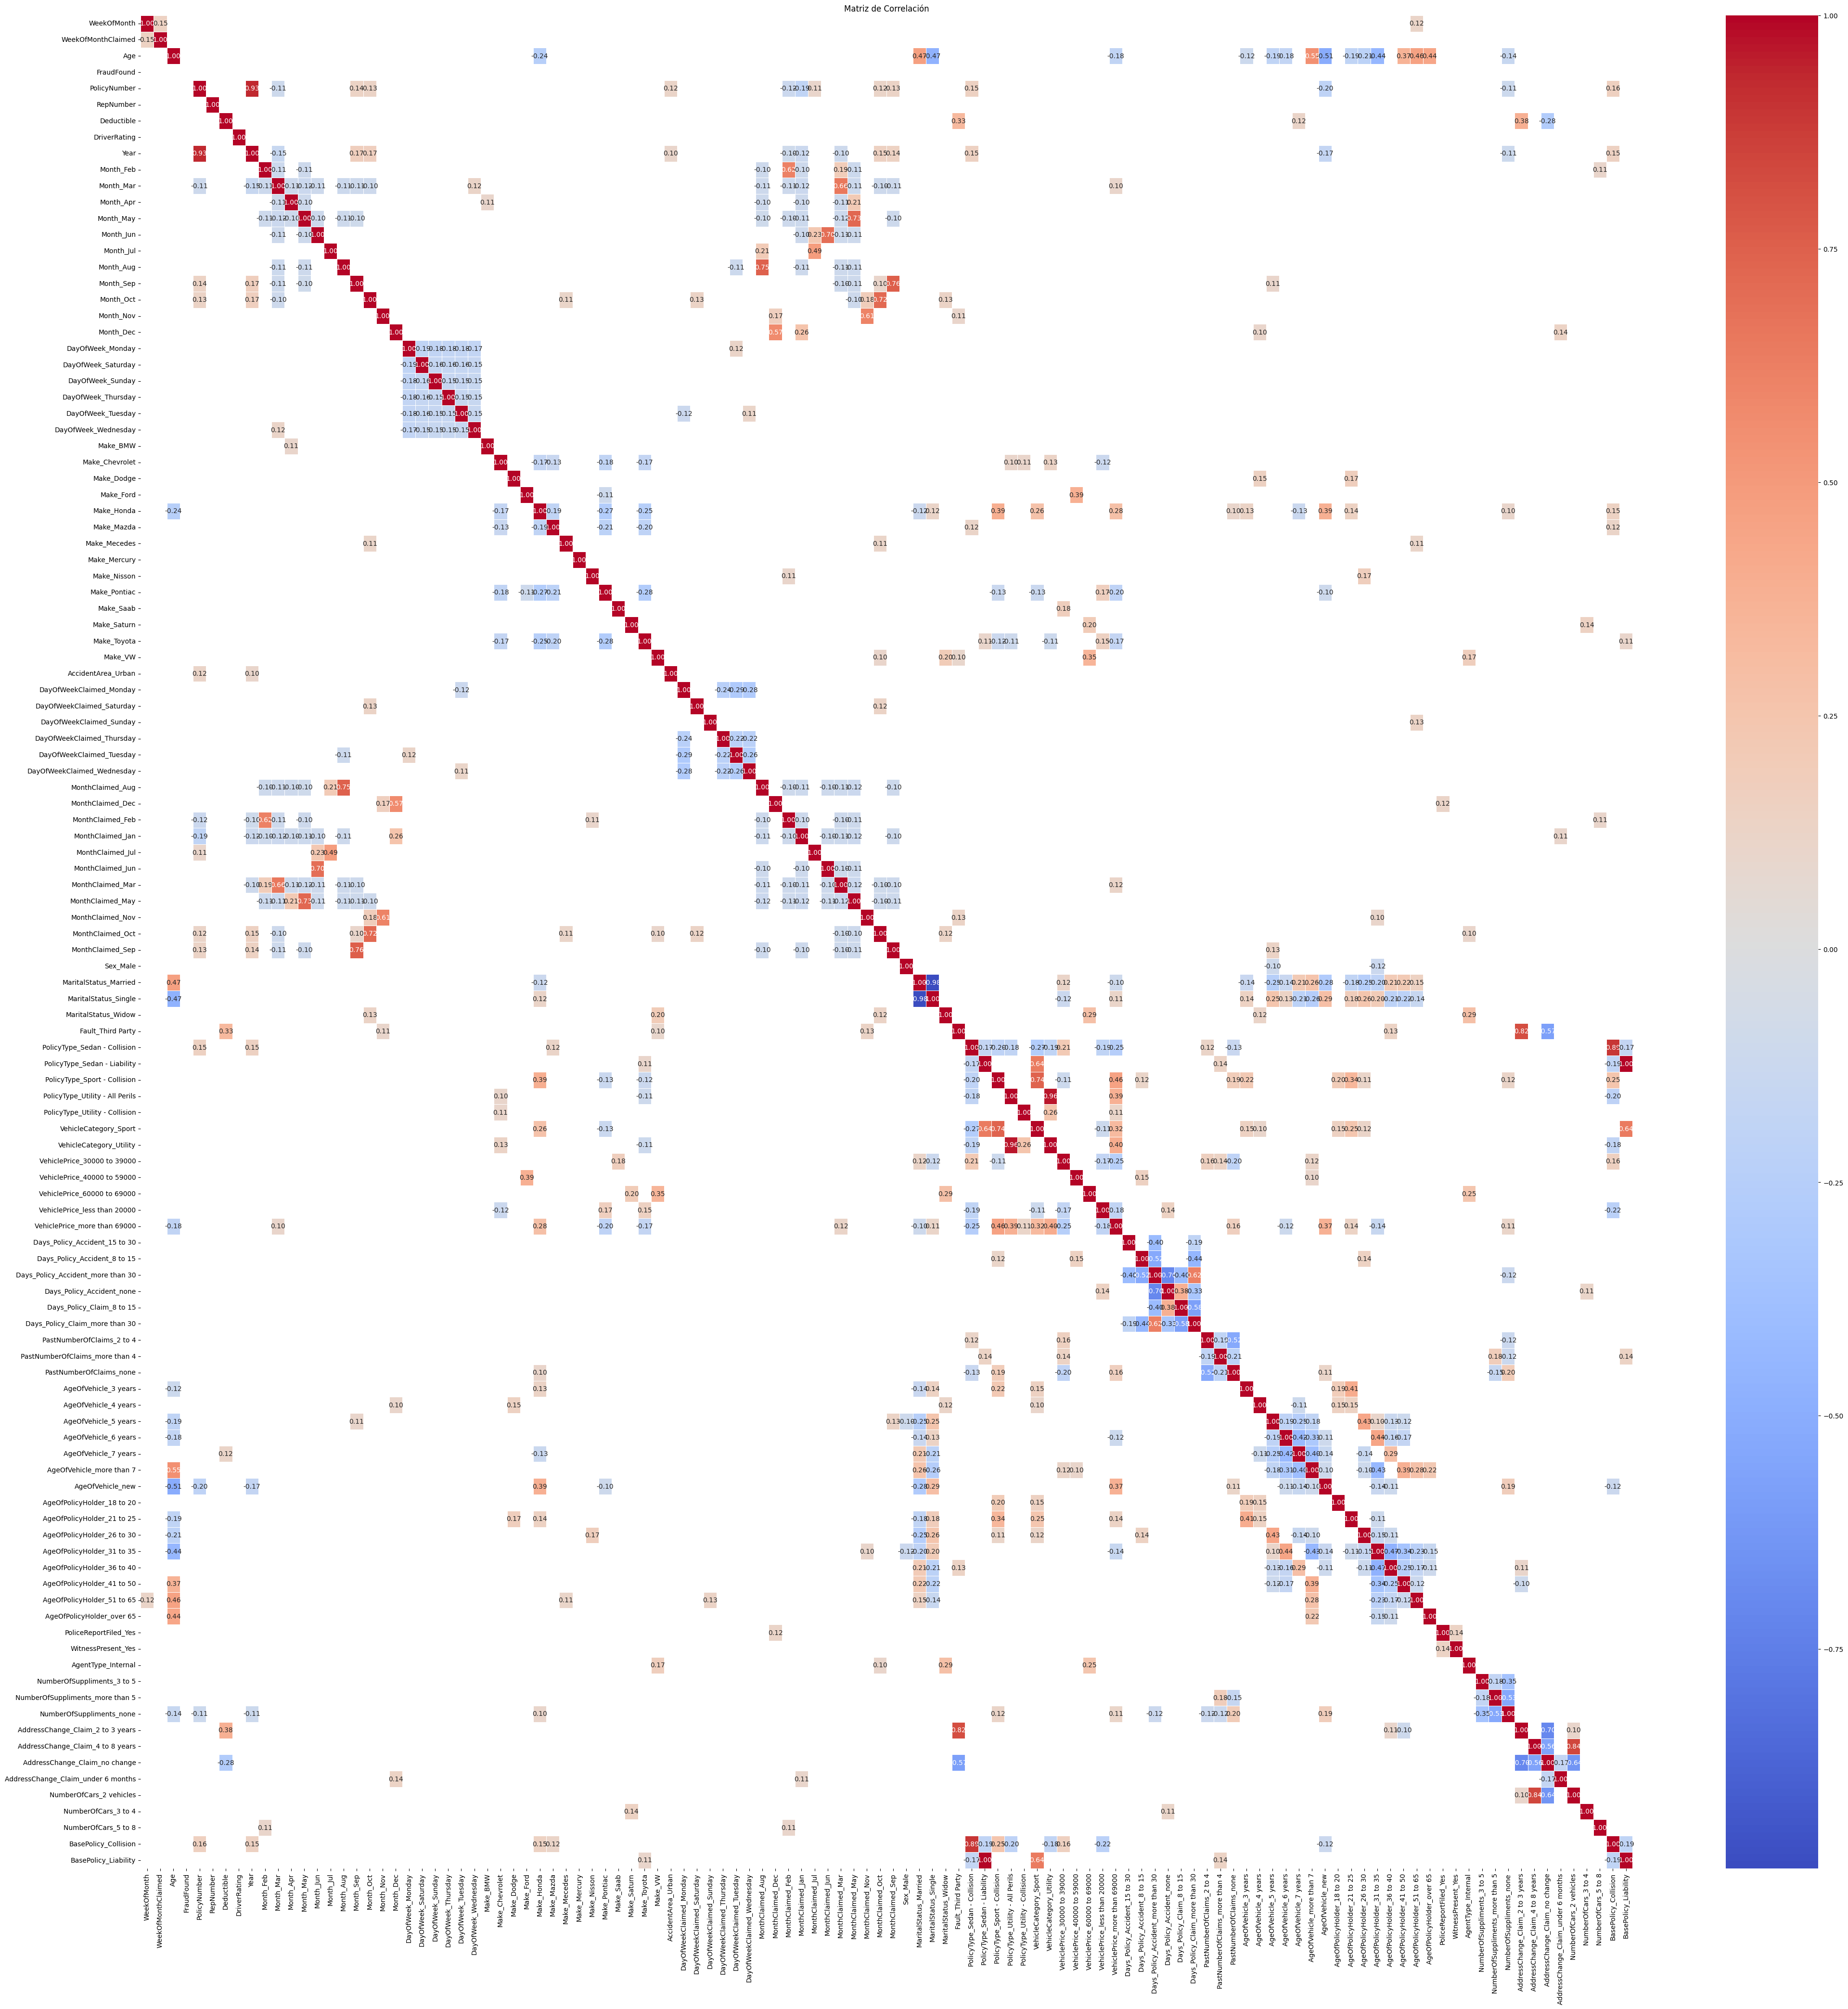

In [ ]:
# Visualizar la matriz de correlación
plt.figure(figsize=(50, 50))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()
# # Este gráfico de calor muestra solo las correlaciones entre los atributos( grado de fuerza y dirrecion entre dos atributos)
# se observa ruido de informacion que no aporta contexto y el interes el vizualizar solo lo relacionado
# procedamos a filtrar solo los atirbutos con una  correlacion superior a 0.5.

In [ ]:
## Filtrar las correlaciones que sean superiores a 0.5
filtered_corr_matrix = correlation_matrix.where(correlation_matrix > 0.5)


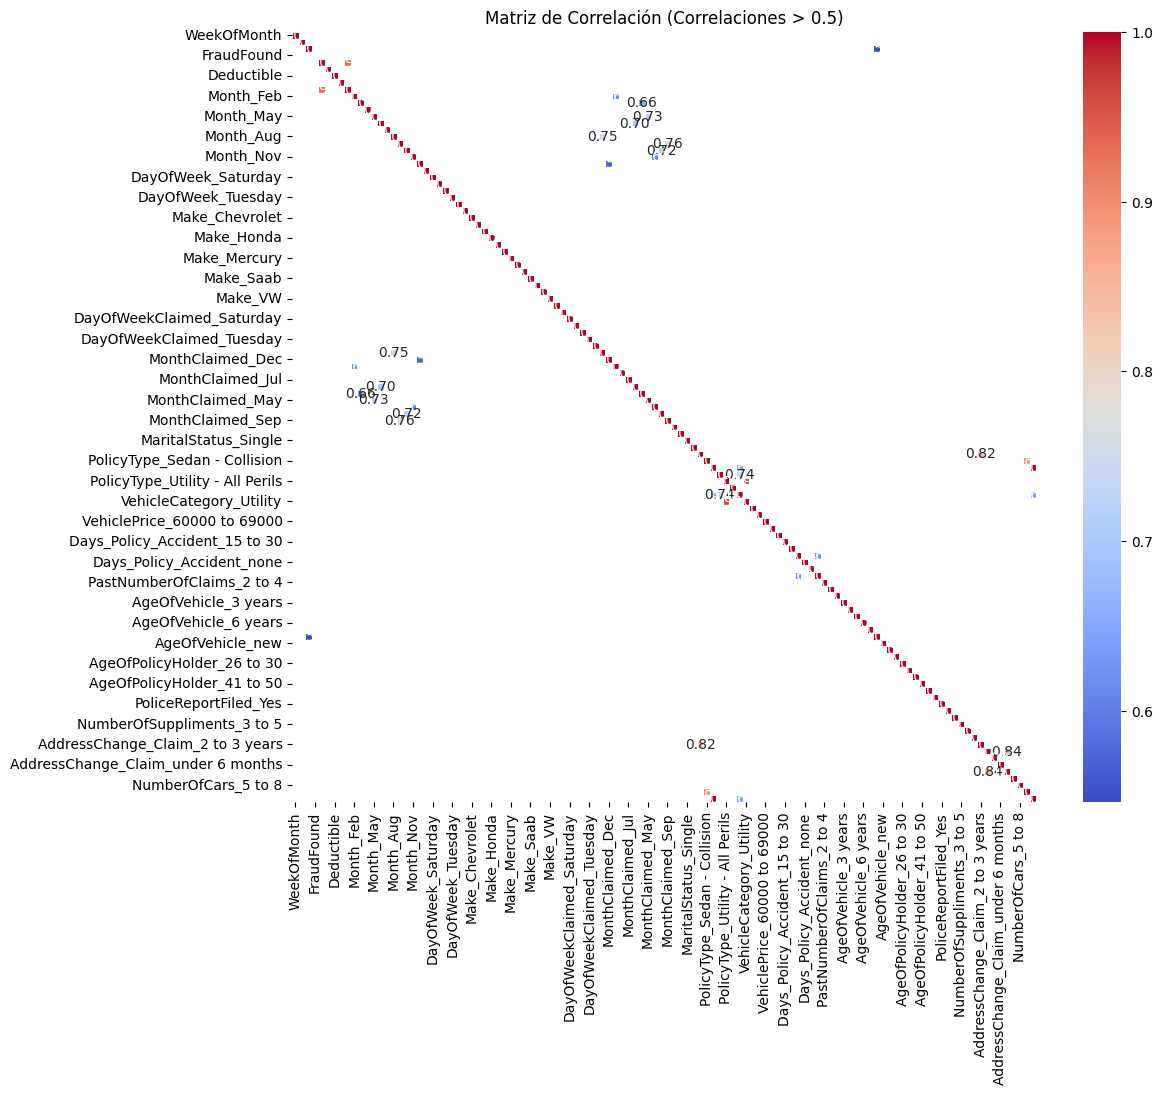

In [ ]:
# Visualizar la matriz de correlación filtrada
plt.figure(figsize=(12, 10))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, mask=np.isnan(filtered_corr_matrix))
plt.title('Matriz de Correlación (Correlaciones > 0.5)')
plt.show()
# Este gráfico de calor muestra solo las correlaciones entre los atributos que son superiores a 0.5.
# La matriz de correlación ha sido filtrada para resaltar únicamente las relaciones más fuertes entre las variables.
# De acuerdo con este análisis, no hay evidencias de una correlación significativa (superior a 0.5) entre la presencia de fraude y ninguno de los otros atributos del conjunto de datos.


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

### PCA

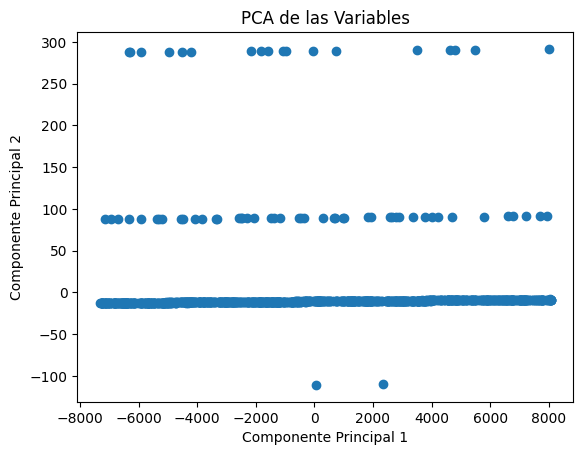

In [ ]:
# Aplicar PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_encoded.dropna())

# Visualizar los componentes principales
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA de las Variables')
plt.show()

## Importancia de Caractersticas

La importancia de características (o "feature importance" en inglés) es una técnica que se utiliza para identificar y cuantificar la influencia de cada característica (o variable) en la predicción de un modelo de machine learning. Evaluar la importancia de las características puede ayudar a entender mejor el modelo, a seleccionar características relevantes y a mejorar la interpretabilidad del modelo.

In [ ]:
df_encoded2 = pd.get_dummies(df1, drop_first=True)

In [ ]:
df_encoded2.shape

(15420, 125)

In [ ]:
df_encoded2['FraudFound'].value_counts()

FraudFound
0    14497
1      923
Name: count, dtype: int64

In [ ]:
# Separar características y la variable objetivo
X = df_encoded2.drop('FraudFound', axis=1)
y = df_encoded2['FraudFound']

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Entrenar un modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)


RandomForestClassifier(random_state=42)

In [ ]:
# Obtener la importancia de las características
importances = model.feature_importances_
feature_names = X.columns

In [ ]:
# Crear un DataFrame para visualizar las importancias
importance_df = pd.DataFrame({
    'Característica': feature_names,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)


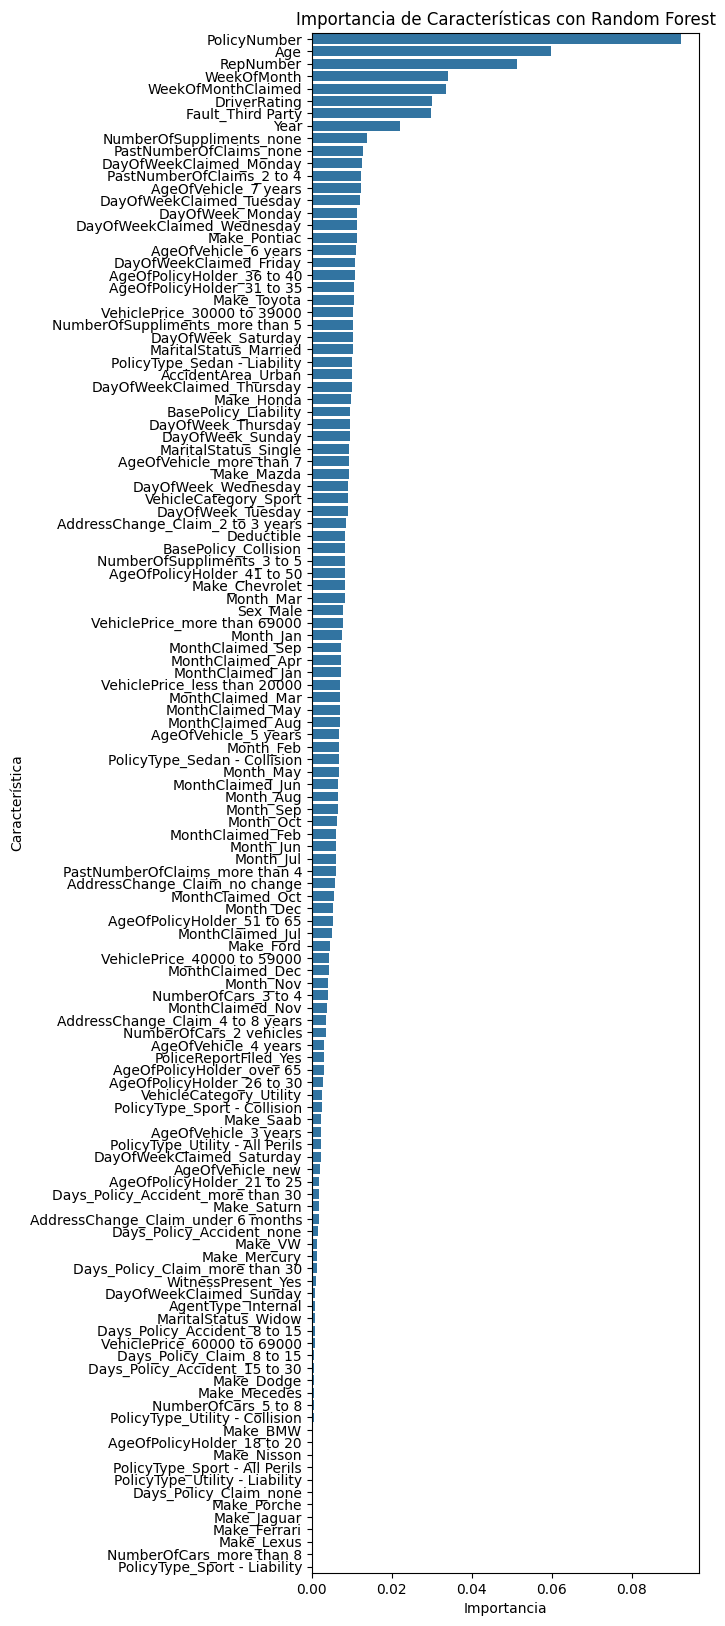

In [ ]:
# Visualizar las importancias
plt.figure(figsize=(5, 20))
sns.barplot(x='Importancia', y='Característica', data=importance_df)
plt.title('Importancia de Características con Random Forest')
plt.show()

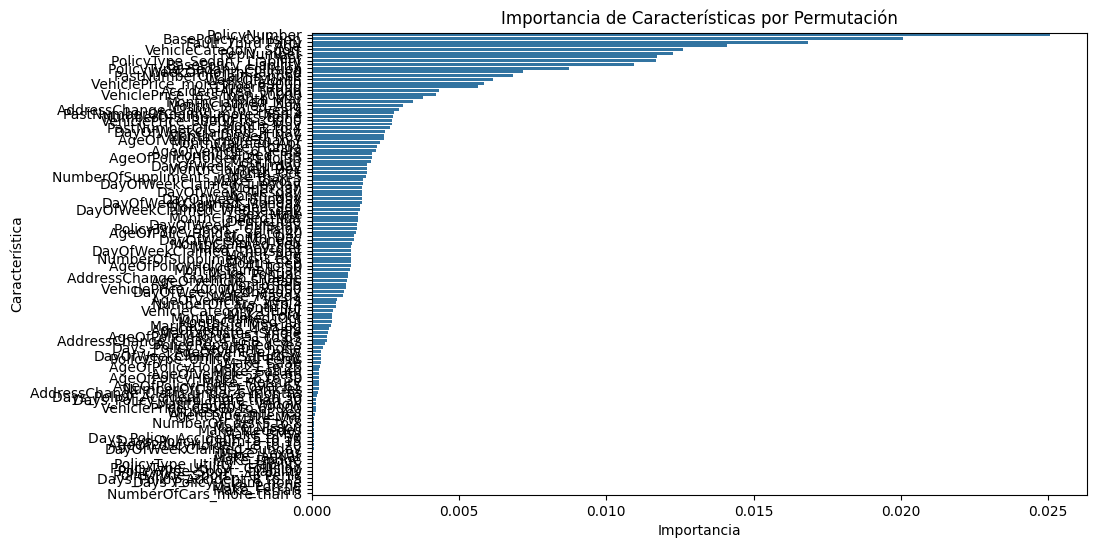

In [ ]:
from sklearn.inspection import permutation_importance

# Entrenar el modelo nuevamente
model.fit(X, y)

# Calcular la importancia de características por permutación
perm_importance = permutation_importance(model, X, y, n_repeats=30, random_state=42)

# Crear un DataFrame para visualizar las importancias
perm_importance_df = pd.DataFrame({
    'Característica': feature_names,
    'Importancia': perm_importance.importances_mean
}).sort_values(by='Importancia', ascending=False)

# Visualizar las importancias
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Característica', data=perm_importance_df)
plt.title('Importancia de Características por Permutación')
plt.show()


# Insigths del EDA

*   Se realizo un perfilamiento de los atributos con mayor frencuencia en la poblacion que realizan fraudes( Analisis Univariado)
*   No se evidencia correlacion lineal entre los atributos vs fraude( Analsisi Bivariado)



# ML

Objetivos de la seccion

1. Recopilación y Preprocesamiento de Datos: Preparar los datos para el entrenamiento del modelo.
2. Selección y Entrenamiento del Modelo: Elegir el algoritmo adecuado y entrenar el modelo usando los datos preparados.
3. Evaluación del Modelo: Utilizar técnicas de validación cruzada y métricas de rendimiento para evaluar el modelo.
4. Optimización: Ajustar los hiperparámetros y refinar el modelo para mejorar su rendimiento.
5. Despliegue: Implementar el modelo en un entorno de producción.
6. Monitoreo y Mantenimiento: Supervisar el desempeño del modelo y realizar actualizaciones según sea necesario.

In [ ]:
df = pd.get_dummies(df, columns=['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed',
                                 'WeekOfMonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'VehicleCategory', 'VehiclePrice', 'RepNumber',
                                 'DriverRating', 'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
                                 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments',
                                 'AddressChange_Claim', 'NumberOfCars', 'Year', 'BasePolicy'],
                    drop_first=True)

## Dividimos en train y test. (Split between train and test)

In [ ]:
X=df.drop(columns=['FraudFound_P'])
y=df['FraudFound_P']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=137, stratify=y)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(10570, 134)

(4530, 134)

(10570,)

(4530,)

In [ ]:
oversampler = RandomOverSampler(sampling_strategy='minority', random_state=137)
X_train_os, y_train_os = oversampler.fit_resample(X_train, y_train)
display(X_train_os.shape, X_test.shape, y_train_os.shape, y_test.shape)

(19892, 134)

(4530, 134)

(19892,)

(4530,)

In [ ]:
folds = StratifiedKFold(n_splits=5, random_state=137, shuffle=True)

In [ ]:
pasos = [('procesamiento', StandardScaler(with_mean=False)),
         ('clasificador', XGBClassifier(n_jobs=-1, use_label_encoder=False, random_state=137))]

pipe = Pipeline(pasos)

In [ ]:
param_grid = [
    {
        "clasificador__n_estimators" : [50, 100, 150],
        "clasificador__learning_rate" : [0.05, 0.1, 0.2],
        "clasificador__colsample_bytree" : [0.5, 1],
        "clasificador__num_leaves" : [31, 45, 62],
        "clasificador__reg_alpha" : [0, 0.5],
        "clasificador": [lgb.LGBMClassifier(random_state=137)]
    },
    {
        "clasificador__n_estimators" : [50, 100, 150],
        "clasificador__learning_rate" : [0.05, 0.1, 0.2],
        "clasificador__subsample" : [0.5, 1],
        "clasificador__max_depth" : [3, 4, 6],
        "clasificador": [GradientBoostingClassifier(random_state=137)]
    },
    {
        "clasificador__n_estimators" : [50, 100, 150],
        "clasificador__learning_rate" : [0.05, 0.1, 0.2],
        "clasificador__max_depth" : [3, 4, 6],
    }
]

In [ ]:
pipe_grid = GridSearchCV(pipe, param_grid, cv=folds)
pipe_grid.fit(X_train_os, y_train_os)

[LightGBM] [Info] Number of positive: 7957, number of negative: 7956
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001794 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 320
[LightGBM] [Info] Number of data points in the train set: 15913, number of used features: 127
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500031 -> initscore=0.000126
[LightGBM] [Info] Start training from score 0.000126
[LightGBM] [Info] Number of positive: 7956, number of negative: 7957
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001506 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 320
[LightGBM] [Info] Number of data points in the train set: 15913, number of used features: 127
[LightGBM] [Info] [binar

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=137, shuffle=True),
             estimator=Pipeline(steps=[('procesamiento',
                                        StandardScaler(with_mean=False)),
                                       ('clasificador',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=F...
                          'clasificador__reg_alpha': [0, 0.5]},
                         {'clasificador': [GradientBoostingClassifier(random_state=137)],
                          'clasificador__learning_rate': [0.05, 0.1, 0.2],
                          'clasificador__max_depth': [3, 4, 6],
                          'clasificador__n_estimators': [50, 100, 150],
                          'clasificador__subsample': [0.5, 1]},
                         {'clasificador__learning_rate': [0.05, 0.1, 0.2],
                          'clasificador__max_depth': [3, 4, 6],
                          'clasificador__n_estimators': [50, 100, 150]}])

In [ ]:
pipe_grid.best_estimator_

Pipeline(steps=[('procesamiento', StandardScaler(with_mean=False)),
                ('clasificador',
                 LGBMClassifier(colsample_bytree=1, learning_rate=0.2,
                                n_estimators=150, num_leaves=62,
                                random_state=137, reg_alpha=0))])

In [ ]:
df_pipe_grid = pd.DataFrame(pipe_grid.cv_results_)
df_pipe_grid[['rank_test_score', 'mean_test_score', 'param_clasificador']].sort_values(by='rank_test_score').head()

rank_test_score  mean_test_score  \
106                1         0.985572   
52                 2         0.984366   
107                3         0.981500   
100                4         0.979138   
104                5         0.978836   

                                    param_clasificador  
106  LGBMClassifier(colsample_bytree=1, learning_ra...  
52   LGBMClassifier(colsample_bytree=1, learning_ra...  
107  LGBMClassifier(colsample_bytree=1, learning_ra...  
100  LGBMClassifier(colsample_bytree=1, learning_ra...  
104  LGBMClassifier(colsample_bytree=1, learning_ra...

# Evaluacion del Modelo

## Matriz de confusion

In [ ]:
y_pred = pipe_grid.best_estimator_.predict(X_test)

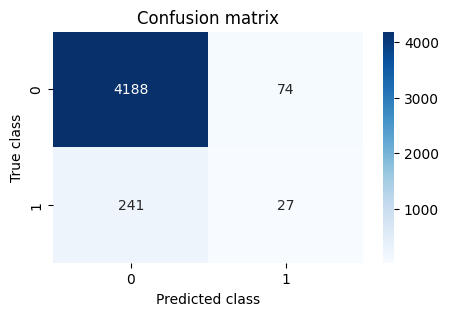

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, cmap='Blues', annot=True, fmt="d");
plt.title("Confusion matrix"); plt.ylabel('True class'); plt.xlabel('Predicted class')
plt.show()

## Curva ROC

In [ ]:
y_pred_proba = pipe_grid.best_estimator_.predict_proba(X_test)

fpr_log, tpr_log, thr_log = roc_curve(y_test, y_pred_proba[:,1])

Area bajo la curva ROC: 0.8356


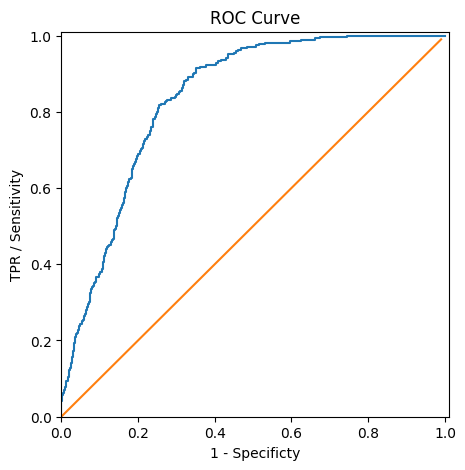

In [ ]:
df = pd.DataFrame(dict(fpr = fpr_log, tpr=tpr_log, thr = thr_log))

print('Area bajo la curva ROC:',np.round(roc_auc_score(y_test, y_pred_proba[:,1]),4))

plt.figure(figsize=(5, 5))
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df['fpr'],df['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

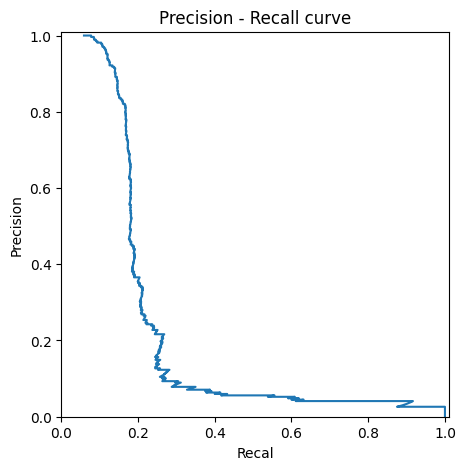

In [ ]:
prec, recall, _ = precision_recall_curve(y_test, y_pred_proba[:,1], pos_label=1)

plt.figure(figsize=(5, 5))
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('Recal')
plt.ylabel('Precision')
plt.title('Precision - Recall curve')
plt.plot(prec, recall)
plt.show()

# Optimizacion del Modelo

In [ ]:
def matriz(y_pred_proba, thresh):

    conf_matrix = confusion_matrix(y_test, y_pred_proba)

    porc_neg = round((conf_matrix[0,0] / (conf_matrix[0,0] + conf_matrix[0,1])) * 100)
    porc_neg_text = f"{porc_neg}% no fraudes correctos"

    porc_pos = round((conf_matrix[1,1] / (conf_matrix[1,0] + conf_matrix[1,1])) * 100)

    porc_text = f"{porc_neg}% no fraudes predichos correctamente\n{porc_pos}% si fraudes predichos correctamente"

    plt.figure(figsize=(5, 3))
    sns.heatmap(conf_matrix, cmap='Blues', annot=True, fmt="d");
    plt.title(f"Confusion matrix threshold = {thresh}"); plt.ylabel('True class'); plt.xlabel('Predicted class')
    plt.text(x=0.1, y=2.7, s=porc_text)#, fontsize = 22
    plt.show

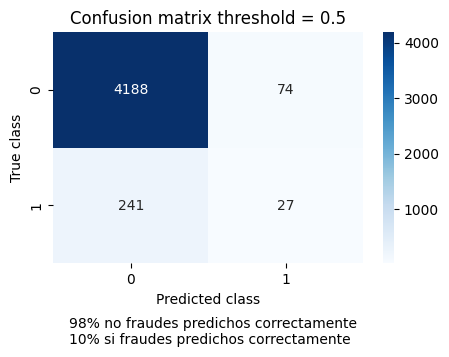

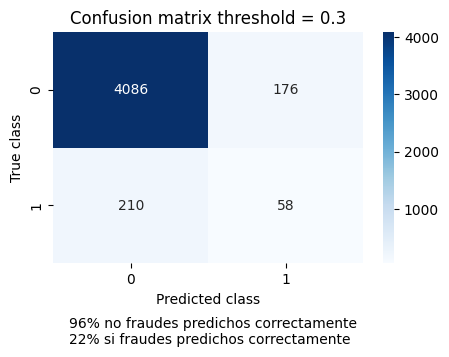

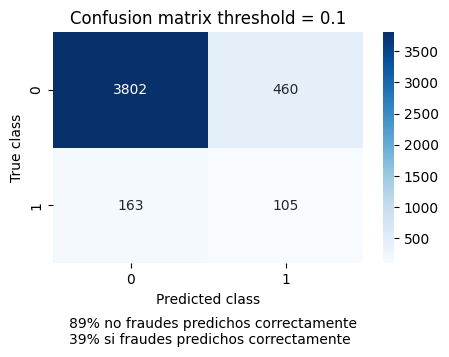

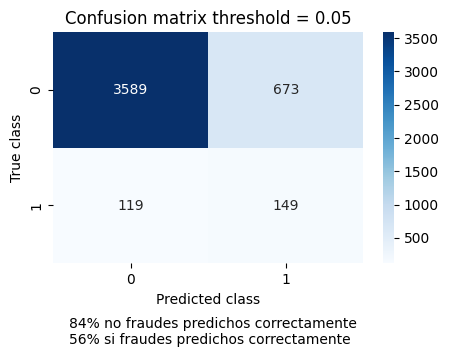

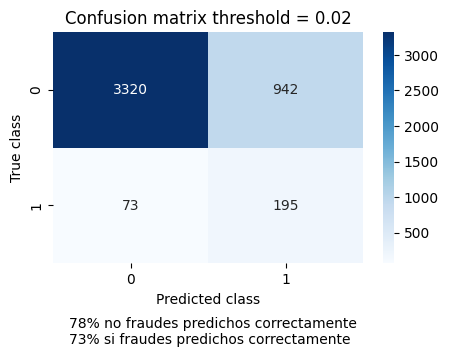

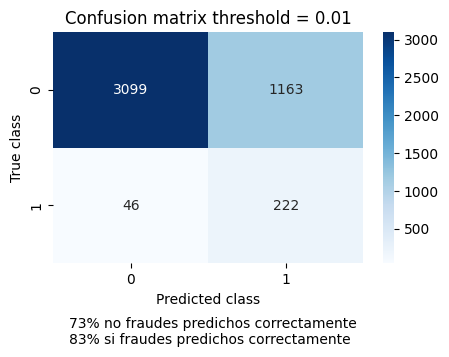

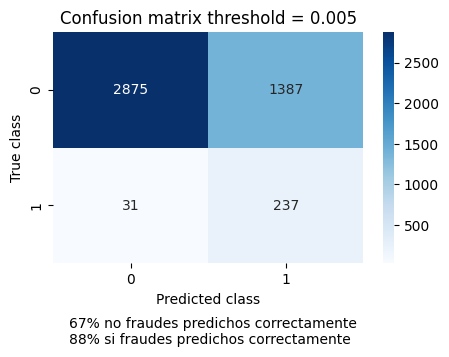

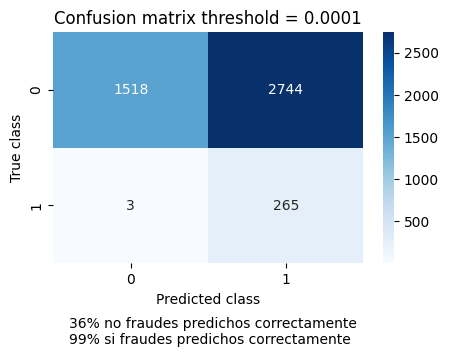

In [ ]:
thresh_list = [0.5, 0.3, 0.1, 0.05, 0.02, 0.01, 0.005, 0.0001]

for thresh in thresh_list:
    y_pred_thresh = (y_pred_proba[:,1] >= thresh).astype(bool)
    matriz(y_pred_thresh, thresh)

In [ ]:
matrix_dict = {}

thresh_list = [0.5, 0.3, 0.1, 0.05, 0.02, 0.01, 0.005, 0.0001]

for thresh in thresh_list:
    y_pred_thresh = (y_pred_proba[:,1] >= thresh).astype(bool)
    conf_matrix = confusion_matrix(y_test, y_pred_thresh)

    matrix_str = f"Matrix Thresh {thresh}"
    porc_str = f"% con Thresh {thresh}"

    porc_neg = round((conf_matrix[0,0] / (conf_matrix[0,0] + conf_matrix[0,1])) * 100)
    porc_neg_str = f"{porc_neg}%"

    porc_pos = round((conf_matrix[1,1] / (conf_matrix[1,0] + conf_matrix[1,1])) * 100)
    porc_pos_str = f"{porc_pos}%"

    matrix_dict[matrix_str] = {"No fraude" : conf_matrix[0,0:],
                                "Si fraude" : conf_matrix[1,0:]}

    matrix_dict[porc_str] = {"No fraude" : porc_neg_str,
                                "Si fraude" : porc_pos_str}

df_thresh = pd.DataFrame(matrix_dict)

In [ ]:
df_thresh

Matrix Thresh 0.5 % con Thresh 0.5 Matrix Thresh 0.3  \
No fraude        [4188, 74]              98%       [4086, 176]   
Si fraude         [241, 27]              10%         [210, 58]   

          % con Thresh 0.3 Matrix Thresh 0.1 % con Thresh 0.1  \
No fraude              96%       [3802, 460]              89%   
Si fraude              22%        [163, 105]              39%   

          Matrix Thresh 0.05 % con Thresh 0.05 Matrix Thresh 0.02  \
No fraude        [3589, 673]               84%        [3320, 942]   
Si fraude         [119, 149]               56%          [73, 195]   

          % con Thresh 0.02 Matrix Thresh 0.01 % con Thresh 0.01  \
No fraude               78%       [3099, 1163]               73%   
Si fraude               73%          [46, 222]               83%   

          Matrix Thresh 0.005 % con Thresh 0.005 Matrix Thresh 0.0001  \
No fraude        [2875, 1387]                67%         [1518, 2744]   
Si fraude           [31, 237]                88%             [3, 265]   

          % con Thresh 0.0001  
No fraude                 36%  
Si fraude                 99%

# Features Importance

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9946, number of negative: 9946
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001958 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 323
[LightGBM] [Info] Number of data points in the train set: 19892, number of used features: 128
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

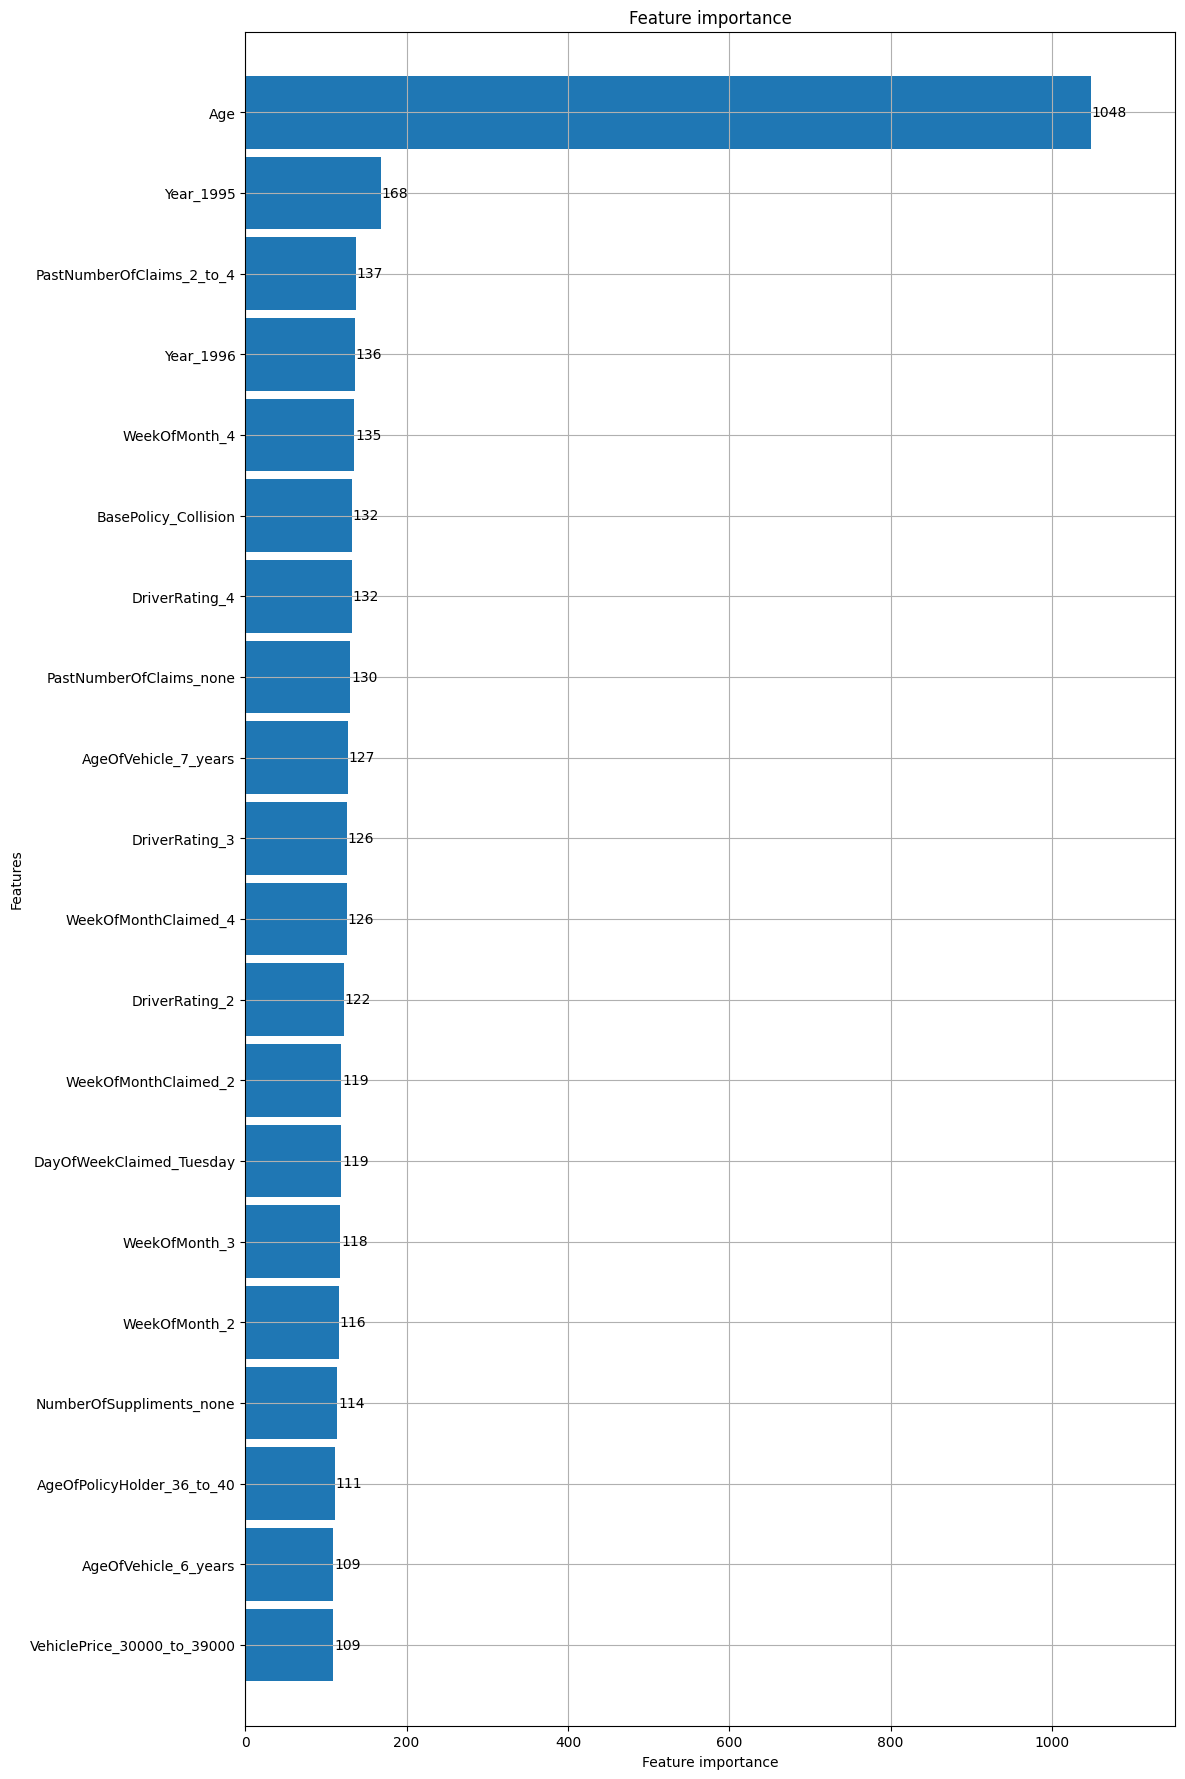

In [ ]:
lgbm_model = lgb.LGBMClassifier(colsample_bytree=0.5, learning_rate=0.2,
                                n_estimators=150, num_leaves=62,
                                random_state=137, reg_alpha=0)

lgbm_model.fit(X_train_os, y_train_os)

plt.rcParams["figure.figsize"] = (12, 22)

lgb.plot_importance(lgbm_model, max_num_features = 20, height=.9)